# Intro 

this notebook looks into the data analysis of base addition model 
1. Import relevant packages 
2. Import data from external excel 

## Importing relevant packages 

In [226]:
#importing relevant packages needed 
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.nonparametric.smoothers_lowess import lowess
#for machine learning model 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

## Import data from excel 

In [227]:
#reference to data 
file = "final_data.xlsx"
sheets = pd.read_excel(file, sheet_name=None,header=1)
sheet_names = sheets.keys()
print(sheet_names)

dict_keys(['5a', '5b', '5c', '5d', '5e', 'HPLC', 'Formula'])


In [228]:
a = sheets['5a']
b = sheets['5b']
c = sheets['5c']
d = sheets['5d']
e = sheets['5e']
HPLC = sheets['HPLC']

In [229]:
a.head()

,No,Time,pH,Base volume,Time.1,pH.1,Base volume.1,Time.2,pH.2,Base volume.2
0,NaN,0.000078,8.194,0.0,0.000053,8.237,0.0,0.000053,8.098,0.0
1,NaN,0.016770,8.194,0.0,0.016736,8.237,0.0,0.016733,8.098,0.0
2,NaN,0.033460,8.200,0.0,0.033411,8.237,0.0,0.033633,8.098,0.0
3,NaN,0.050160,8.200,0.0,0.050089,8.237,0.0,0.050317,8.098,0.0
4,NaN,0.067290,8.204,0.0,0.066769,8.206,0.0,0.067006,8.092,0.0


In [230]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             0 non-null      float64
 1   Time           7212 non-null   float64
 2   pH             7212 non-null   float64
 3   Base volume    7212 non-null   float64
 4   Time.1         7197 non-null   float64
 5   pH.1           7197 non-null   float64
 6   Base volume.1  7197 non-null   float64
 7   Time.2         7214 non-null   float64
 8   pH.2           7214 non-null   float64
 9   Base volume.2  7214 non-null   float64
dtypes: float64(10)
memory usage: 563.7 KB


In [231]:
HPLC.head()

,Time,5a1,5a2,5a3,5b1,5b2,5b3,5c1,5c2,5c3,5d1,5d2,5d3,5e1,5e2,5e3
0,0,0.11332,0.05297,0.06022,0.01744,0.77310,0.17526,0.15824,0.07591,0.15068,0.49441,0.07584,0.11842,0.03660,0.07916,0.05354
1,15,0.89860,2.94901,5.55588,4.46924,5.52007,3.48053,11.34439,11.15317,11.15504,9.09537,7.48106,17.43589,51.98347,39.99362,22.20457
2,24,5.48229,4.27242,14.39435,12.03145,10.56808,6.81426,23.02237,23.79020,22.80438,20.77813,16.95551,26.72136,61.74399,50.16762,34.45911
3,39,24.40291,12.91840,39.90418,25.33770,19.44375,19.13543,35.87431,31.67652,35.64996,33.45845,31.33496,40.33160,69.19597,55.42688,47.92978
4,48,26.10326,15.52301,45.11053,22.44358,24.81787,22.44308,40.35775,31.04953,40.25974,32.12406,37.98876,46.57841,67.01016,60.35880,64.20540


In [232]:
#Extracting different columns as variables 
atime1 = pd.DataFrame(a['Time'])
atime2 = pd.DataFrame(a['Time.1'])
atime3 = pd.DataFrame(a['Time.2'])
apH1 = pd.DataFrame(a['pH'])
apH2 = pd.DataFrame(a['pH.1'])
apH3 = pd.DataFrame(a['pH.2'])
abase1 = pd.DataFrame(a['Base volume'])
abase2 = pd.DataFrame(a['Base volume.1'])
abase3 = pd.DataFrame(a['Base volume.2'])

btime1 = pd.DataFrame(b['Time'])
btime2 = pd.DataFrame(b['Time.1'])
btime3 = pd.DataFrame(b['Time.2'])
bpH1 = pd.DataFrame(b['pH'])
bpH2 = pd.DataFrame(b['pH.1'])
bpH3 = pd.DataFrame(b['pH.2'])
bbase1 = pd.DataFrame(b['Base volume'])
bbase2 = pd.DataFrame(b['Base volume.1'])
bbase3 = pd.DataFrame(b['Base volume.2'])

ctime1 = pd.DataFrame(c['Time'])
ctime2 = pd.DataFrame(c['Time.1'])
ctime3 = pd.DataFrame(c['Time.2'])
cpH1 = pd.DataFrame(c['pH'])
cpH2 = pd.DataFrame(c['pH.1'])
cpH3 = pd.DataFrame(c['pH.2'])
cbase1 = pd.DataFrame(c['Base volume'])
cbase2 = pd.DataFrame(c['Base volume.1'])
cbase3 = pd.DataFrame(c['Base volume.2'])

dtime1 = pd.DataFrame(d['Time'])
dtime2 = pd.DataFrame(d['Time.1'])
dtime3 = pd.DataFrame(d['Time.2'])
dpH1 = pd.DataFrame(d['pH'])
dpH2 = pd.DataFrame(d['pH.1'])
dpH3 = pd.DataFrame(d['pH.2'])
dbase1 = pd.DataFrame(d['Base volume'])
dbase2 = pd.DataFrame(d['Base volume.1'])
dbase3 = pd.DataFrame(d['Base volume.2'])

etime1 = pd.DataFrame(e['Time'])
etime2 = pd.DataFrame(e['Time.1'])
etime3 = pd.DataFrame(e['Time.2'])
epH1 = pd.DataFrame(e['pH'])
epH2 = pd.DataFrame(e['pH.1'])
epH3 = pd.DataFrame(e['pH.2'])
ebase1 = pd.DataFrame(e['Base volume'])
ebase2 = pd.DataFrame(e['Base volume.1'])
ebase3 = pd.DataFrame(e['Base volume.2'])

# HPLC raw data visualisation 

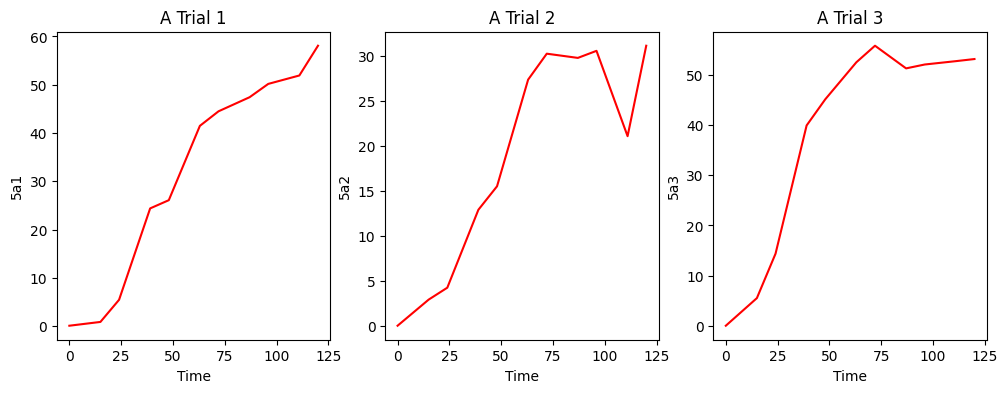

In [233]:
# A trial 
f,axes = plt.subplots(1,3,figsize = (12,4))
sb.lineplot(x=HPLC['Time'],y=HPLC['5a1'],color="red",ax=axes[0])
sb.lineplot(x=HPLC['Time'],y=HPLC['5a2'],color="red", ax=axes[1])
sb.lineplot(x=HPLC['Time'],y=HPLC['5a3'],color="red", ax=axes[2])
axes[0].set_title("A Trial 1")
axes[1].set_title("A Trial 2")
axes[2].set_title("A Trial 3")
plt.show()

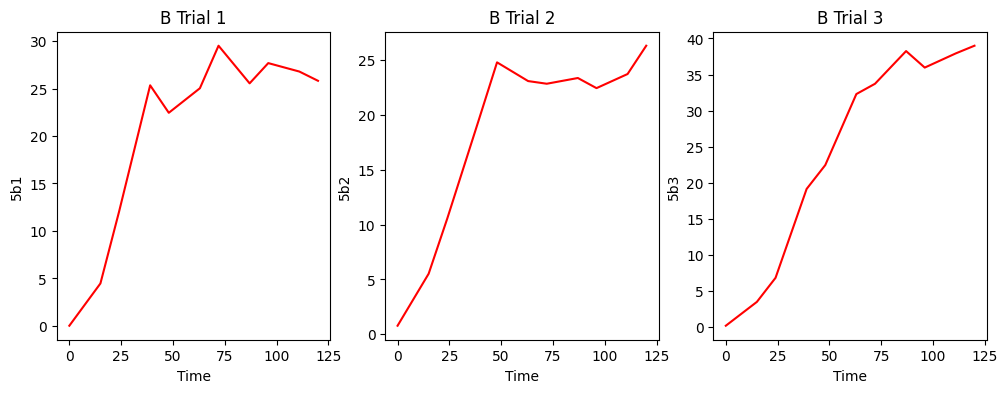

In [234]:
# B trial 
f, axes = plt.subplots(1, 3, figsize=(12, 4))
sb.lineplot(x=HPLC['Time'], y=HPLC['5b1'], color="red", ax=axes[0])
sb.lineplot(x=HPLC['Time'], y=HPLC['5b2'], color="red", ax=axes[1])
sb.lineplot(x=HPLC['Time'], y=HPLC['5b3'], color="red", ax=axes[2])
axes[0].set_title("B Trial 1")
axes[1].set_title("B Trial 2")
axes[2].set_title("B Trial 3")
plt.show()


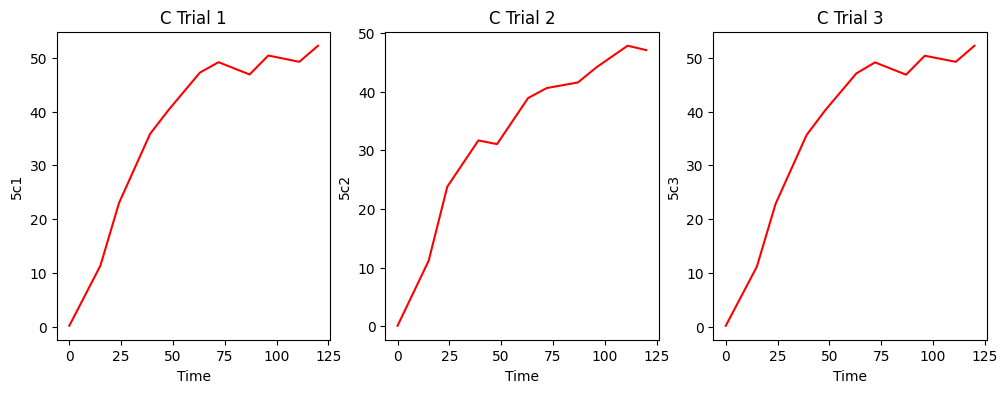

In [235]:
# C trial 
f, axes = plt.subplots(1, 3, figsize=(12, 4))
sb.lineplot(x=HPLC['Time'], y=HPLC['5c1'], color="red", ax=axes[0])
sb.lineplot(x=HPLC['Time'], y=HPLC['5c2'], color="red", ax=axes[1])
sb.lineplot(x=HPLC['Time'], y=HPLC['5c3'], color="red", ax=axes[2])
axes[0].set_title("C Trial 1")
axes[1].set_title("C Trial 2")
axes[2].set_title("C Trial 3")
plt.show()


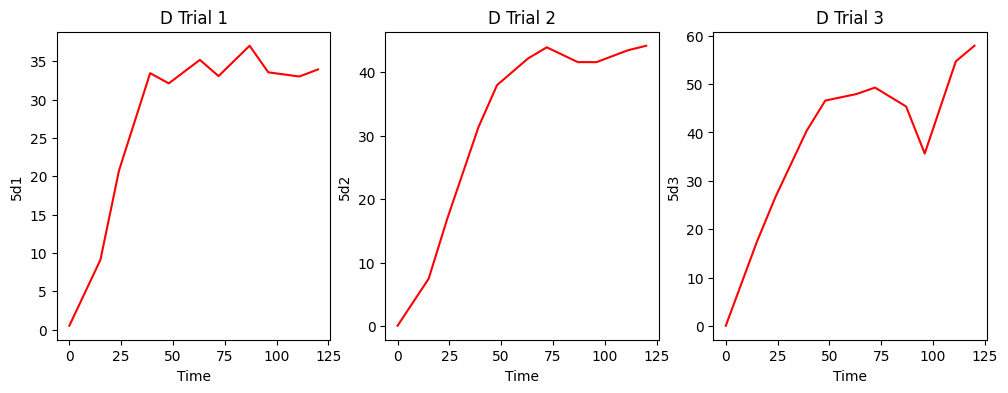

In [236]:
# D trial 
f, axes = plt.subplots(1, 3, figsize=(12, 4))
sb.lineplot(x=HPLC['Time'], y=HPLC['5d1'], color="red", ax=axes[0])
sb.lineplot(x=HPLC['Time'], y=HPLC['5d2'], color="red", ax=axes[1])
sb.lineplot(x=HPLC['Time'], y=HPLC['5d3'], color="red", ax=axes[2])
axes[0].set_title("D Trial 1")
axes[1].set_title("D Trial 2")
axes[2].set_title("D Trial 3")
plt.show()


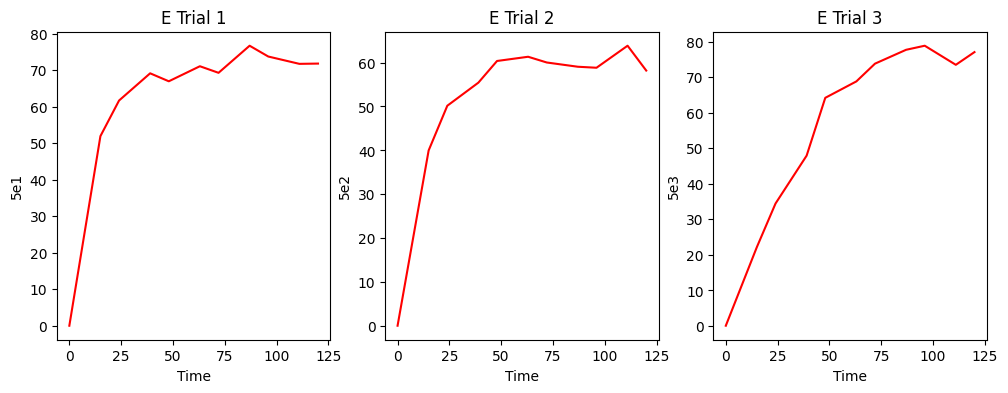

In [237]:
# E trial 
f, axes = plt.subplots(1, 3, figsize=(12, 4))
sb.lineplot(x=HPLC['Time'], y=HPLC['5e1'], color="red", ax=axes[0])
sb.lineplot(x=HPLC['Time'], y=HPLC['5e2'], color="red", ax=axes[1])
sb.lineplot(x=HPLC['Time'], y=HPLC['5e3'], color="red", ax=axes[2])
axes[0].set_title("E Trial 1")
axes[1].set_title("E Trial 2")
axes[2].set_title("E Trial 3")
plt.show()


# Visualising base addition

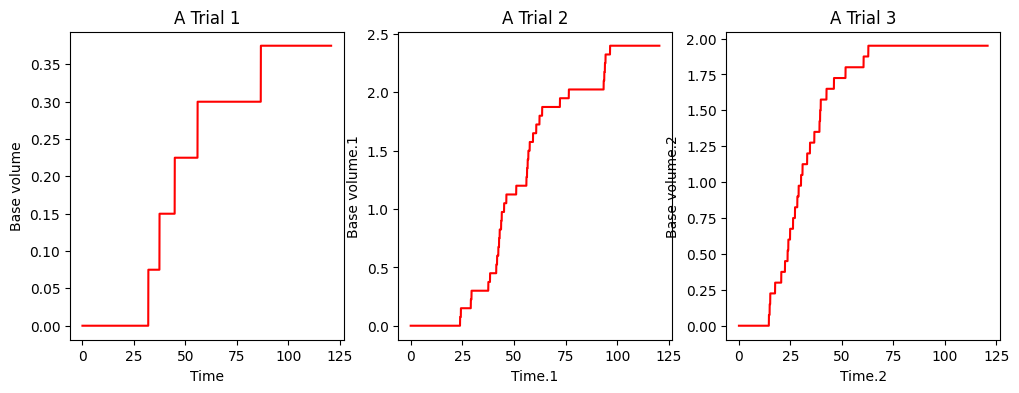

In [238]:
#f,axes = plt.subplots(3,1,figsize = (24,36)) for a larger view of graph
f,axes = plt.subplots(1,3,figsize = (12,4))
sb.lineplot(x=atime1.iloc[:,0],y=abase1.iloc[:,0],color="red",ax=axes[0])
sb.lineplot(x=atime2.iloc[:,0],y=abase2.iloc[:,0],color="red", ax=axes[1])
sb.lineplot(x=atime3.iloc[:,0],y=abase3.iloc[:,0],color="red", ax=axes[2])
axes[0].set_title("A Trial 1")
axes[1].set_title("A Trial 2")
axes[2].set_title("A Trial 3")
plt.show()

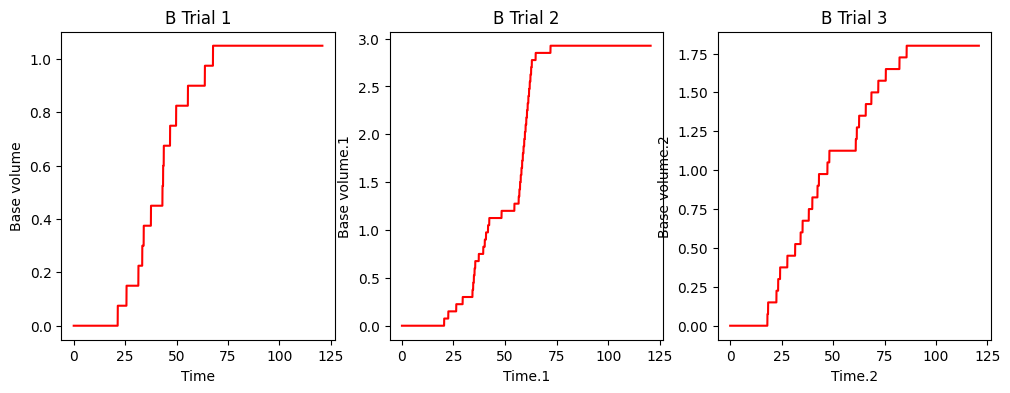

In [239]:
f,axes = plt.subplots(1,3,figsize = (12,4))
sb.lineplot(x=btime1.iloc[:,0],y=bbase1.iloc[:,0],color="red",ax=axes[0])
sb.lineplot(x=btime2.iloc[:,0],y=bbase2.iloc[:,0],color="red", ax=axes[1])
sb.lineplot(x=btime3.iloc[:,0],y=bbase3.iloc[:,0],color="red", ax=axes[2])
axes[0].set_title("B Trial 1")
axes[1].set_title("B Trial 2")
axes[2].set_title("B Trial 3")
plt.show()

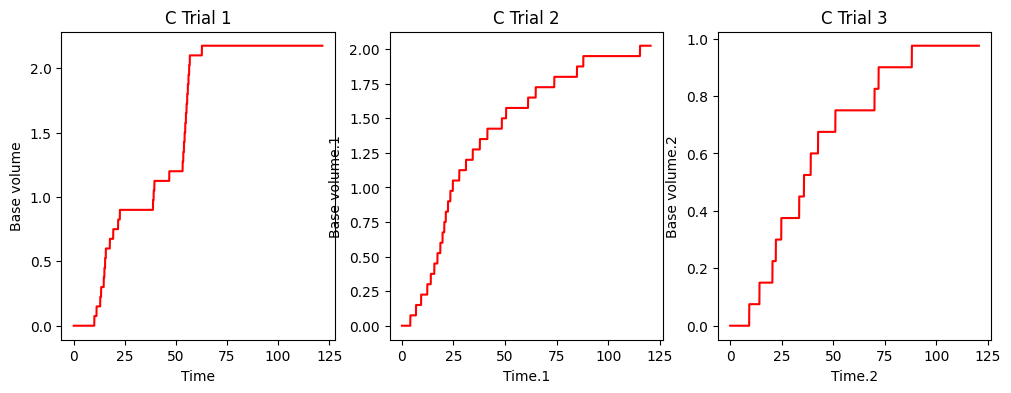

In [240]:
f,axes = plt.subplots(1,3,figsize = (12,4))
sb.lineplot(x=ctime1.iloc[:,0],y=cbase1.iloc[:,0],color="red",ax=axes[0])
sb.lineplot(x=ctime2.iloc[:,0],y=cbase2.iloc[:,0],color="red", ax=axes[1])
sb.lineplot(x=ctime3.iloc[:,0],y=cbase3.iloc[:,0],color="red", ax=axes[2])
axes[0].set_title("C Trial 1")
axes[1].set_title("C Trial 2")
axes[2].set_title("C Trial 3")
plt.show()

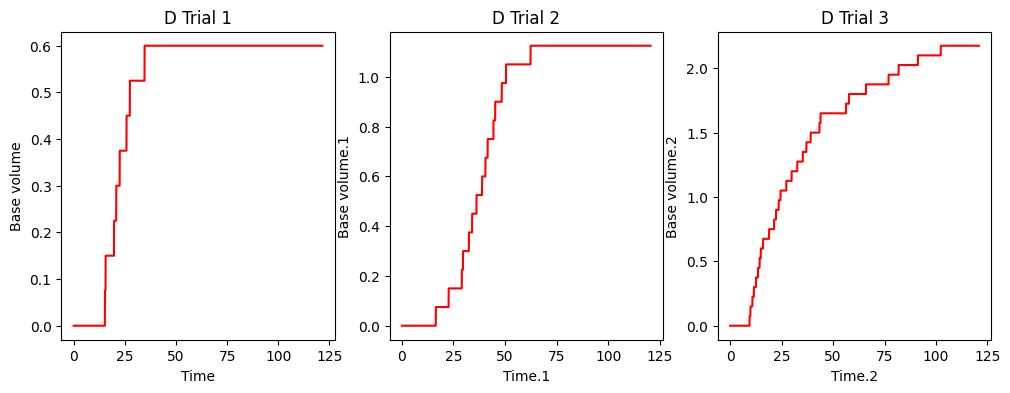

In [241]:
f,axes = plt.subplots(1,3,figsize = (12,4))
sb.lineplot(x=dtime1.iloc[:,0],y=dbase1.iloc[:,0],color="red",ax=axes[0])
sb.lineplot(x=dtime2.iloc[:,0],y=dbase2.iloc[:,0],color="red", ax=axes[1])
sb.lineplot(x=dtime3.iloc[:,0],y=dbase3.iloc[:,0],color="red", ax=axes[2])
axes[0].set_title("D Trial 1")
axes[1].set_title("D Trial 2")
axes[2].set_title("D Trial 3")
plt.show()

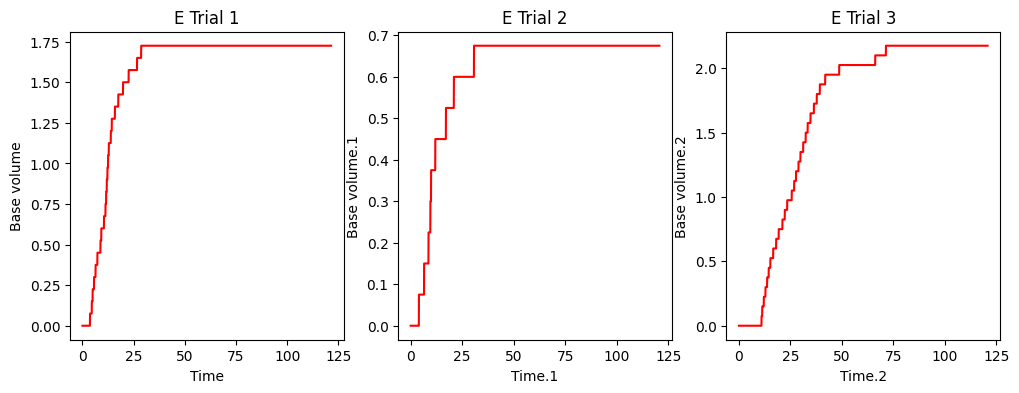

In [242]:
f,axes = plt.subplots(1,3,figsize = (12,4))
sb.lineplot(x=etime1.iloc[:,0],y=ebase1.iloc[:,0],color="red",ax=axes[0])
sb.lineplot(x=etime2.iloc[:,0],y=ebase2.iloc[:,0],color="red", ax=axes[1])
sb.lineplot(x=etime3.iloc[:,0],y=ebase3.iloc[:,0],color="red", ax=axes[2])
axes[0].set_title("E Trial 1")
axes[1].set_title("E Trial 2")
axes[2].set_title("E Trial 3")
plt.show()

## Removed plateau points plot for base addition data:  particle size a

In [243]:

atrial1 = pd.DataFrame({"Time":a['Time'],"Base volume":a['Base volume']}).dropna(how='all')
atrial2 = pd.DataFrame({"Time": a['Time.1'], "Base volume": a['Base volume.1']}).dropna(how='all')
atrial3 = pd.DataFrame({"Time": a['Time.2'], "Base volume": a['Base volume.2']}).dropna(how='all')


In [244]:
#save the last row as a variable for concatenation later 
last1a = atrial1.iloc[-1].copy()
print(atrial1)
print(last1a)

            Time  Base volume
0       0.000078        0.000
1       0.016770        0.000
2       0.033460        0.000
3       0.050160        0.000
4       0.067290        0.000
...          ...          ...
7207  120.756620        0.375
7208  120.773330        0.375
7209  120.790120        0.375
7210  120.806820        0.375
7211  120.823640        0.375

[7212 rows x 2 columns]
Time           120.82364
Base volume      0.37500
Name: 7211, dtype: float64


In [245]:
a1_no_dup = atrial1.drop_duplicates(subset="Base volume", keep="first")
print(a1_no_dup)

           Time  Base volume
0      0.000078        0.000
1908  31.974890        0.075
2232  37.405500        0.150
2674  44.810580        0.225
3336  55.904330        0.300
5171  86.646940        0.375


In [246]:
a1_no_dup = pd.concat([a1_no_dup, last1a.to_frame().T], ignore_index=False)
print(a1_no_dup)

            Time  Base volume
0       0.000078        0.000
1908   31.974890        0.075
2232   37.405500        0.150
2674   44.810580        0.225
3336   55.904330        0.300
5171   86.646940        0.375
7211  120.823640        0.375


In [247]:
#1a
last1a = atrial1.iloc[-1].copy()
a1_no_dup = atrial1.drop_duplicates(subset="Base volume", keep="first")
a1_no_dup = pd.concat([a1_no_dup, last1a.to_frame().T], ignore_index=False)

#2a
last2a = atrial2.iloc[-1].copy()
a2_no_dup = atrial2.drop_duplicates(subset="Base volume", keep="first")
a2_no_dup = pd.concat([a2_no_dup, last2a.to_frame().T], ignore_index=False)

#3a
last3a = atrial3.iloc[-1].copy()
a3_no_dup = atrial3.drop_duplicates(subset="Base volume", keep="first")
a3_no_dup = pd.concat([a3_no_dup, last3a.to_frame().T], ignore_index=False)

print(a1_no_dup)
print(a2_no_dup)
print(a3_no_dup)

            Time  Base volume
0       0.000078        0.000
1908   31.974890        0.075
2232   37.405500        0.150
2674   44.810580        0.225
3336   55.904330        0.300
5171   86.646940        0.375
7211  120.823640        0.375
            Time  Base volume
0       0.000053        0.000
1428   23.895161        0.075
1451   24.280161        0.150
1739   29.099561        0.225
1759   29.434131        0.300
2245   37.566792        0.375
2295   38.403278        0.450
2475   41.415736        0.525
2499   41.817075        0.600
2535   42.419514        0.675
2556   42.771367        0.750
2574   43.072608        0.825
2616   43.775117        0.900
2634   44.076381        0.975
2702   45.214544        1.050
2767   46.302206        1.125
3053   51.088094        1.200
3348   56.024661        1.275
3366   56.325906        1.350
3384   56.627136        1.425
3404   56.961769        1.500
3443   57.614281        1.575
3539   59.220900        1.650
3632   60.776958        1.725
3726   62.

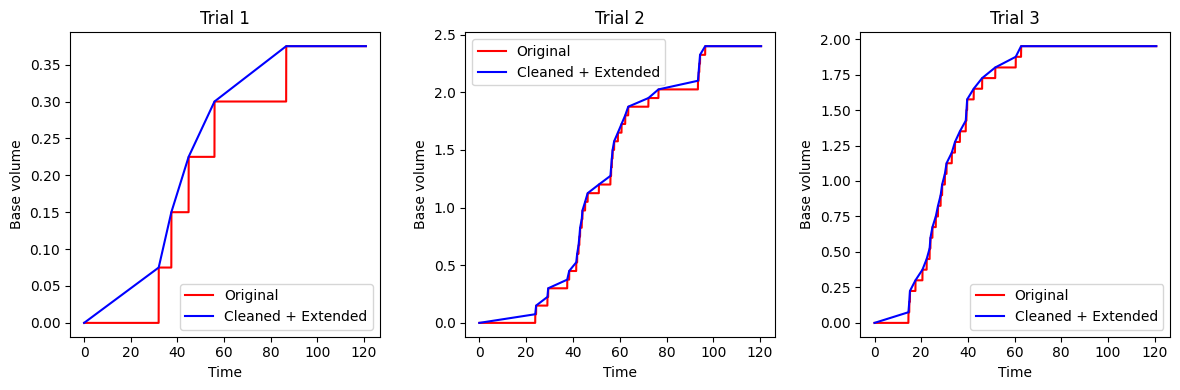

In [248]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, orig, cleaned, title in zip(
    axes,
    [atrial1, atrial2, atrial3],
    [a1_no_dup, a2_no_dup, a3_no_dup],
    ["Trial 1", "Trial 2", "Trial 3"]
):
    ax.plot(orig["Time"], orig["Base volume"], "r-", label="Original")
    ax.plot(cleaned["Time"], cleaned["Base volume"], "b-", label="Cleaned + Extended")
    ax.set_xlabel("Time")
    ax.set_ylabel("Base volume")
    ax.set_title(title)
    ax.legend()

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


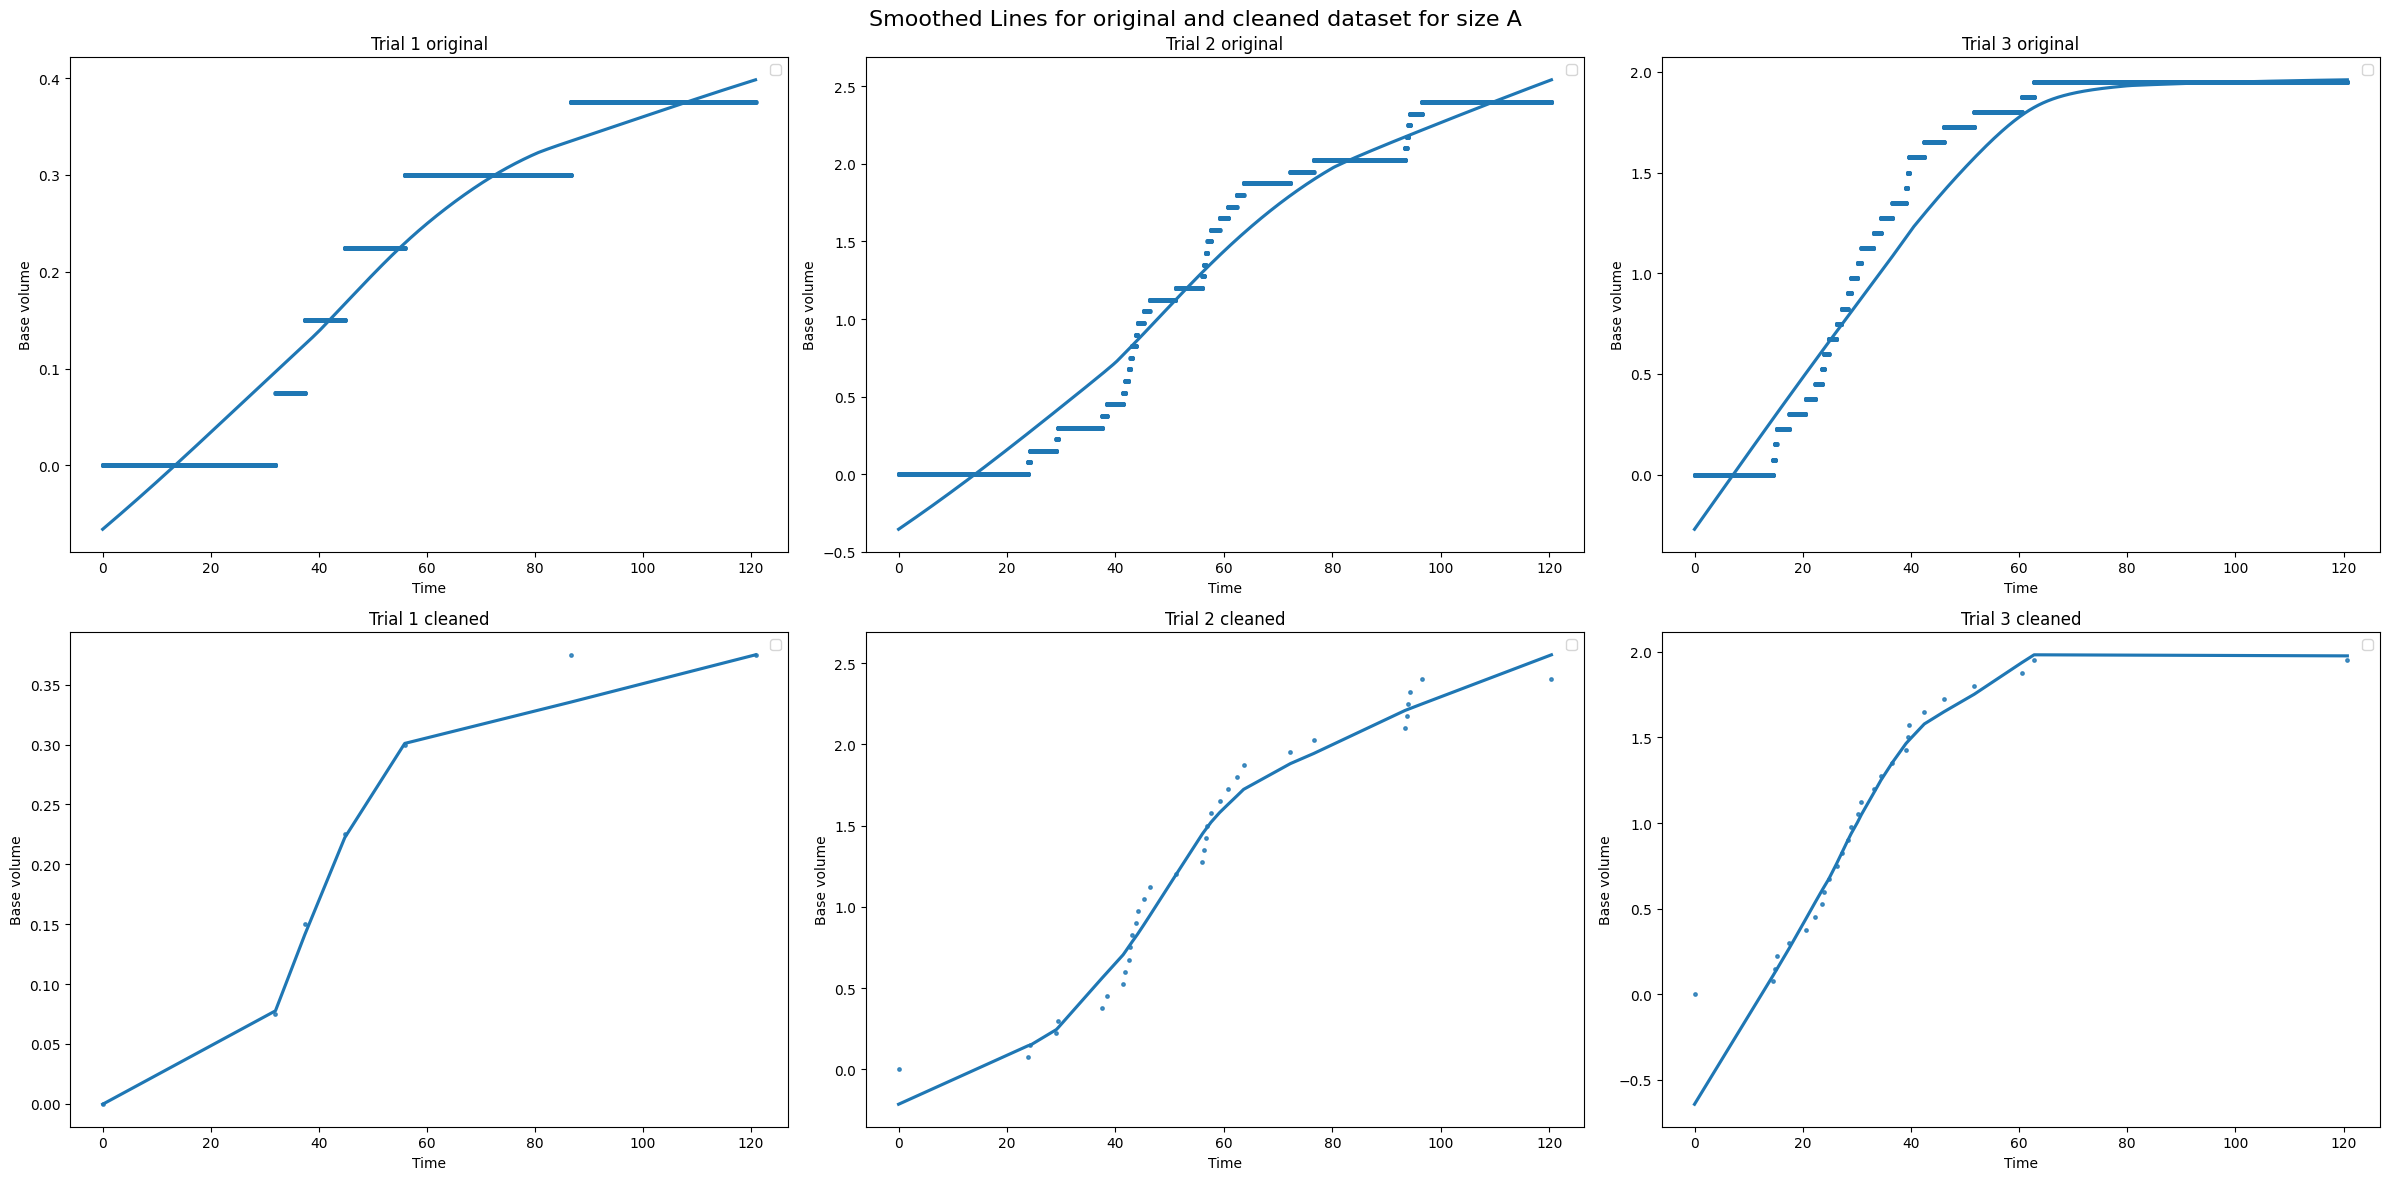

In [249]:
fig, axes= plt.subplots(2,3,figsize=(24,12))


#Trial 1
sb.regplot(x=atrial1["Time"],y=atrial1["Base volume"],lowess=True,scatter=True,ax=axes[0,0],scatter_kws={'s': 6})
axes[0,0].set_title("Trial 1 original")
axes[0,0].legend()

#Trial 2
sb.regplot(x=atrial2["Time"],y=atrial2["Base volume"],lowess=True,scatter=True,ax=axes[0,1],scatter_kws={'s': 6})
axes[0,1].set_title("Trial 2 original")
axes[0,1].legend()

#Trial 3
sb.regplot(x=atrial3["Time"],y=atrial3["Base volume"],lowess=True,scatter=True,ax=axes[0,2],scatter_kws={'s': 6})
axes[0,2].set_title("Trial 3 original")
axes[0,2].legend()

#Trial 1 no duplicates 
sb.regplot(x=a1_no_dup["Time"],y=a1_no_dup["Base volume"],lowess=True,scatter=True,ax=axes[1,0],scatter_kws={'s': 6})
axes[1,0].set_title("Trial 1 cleaned")
axes[1,0].legend()

#Trial 2 no duplicates 
sb.regplot(x=a2_no_dup["Time"],y=a2_no_dup["Base volume"],lowess=True,scatter=True,ax=axes[1,1],scatter_kws={'s': 6})
axes[1,1].set_title("Trial 2 cleaned")
axes[1,1].legend()

#Trial 3 no duplicates 
sb.regplot(x=a3_no_dup["Time"],y=a3_no_dup["Base volume"],lowess=True,scatter=True,ax=axes[1,2],scatter_kws={'s': 6})
axes[1,2].set_title("Trial 3 cleaned")
axes[1,2].legend()

fig.suptitle("Smoothed Lines for original and cleaned dataset for size A", fontsize=16)
''' 
for ax in axes:
    ax.set_xlabel("Time")
    ax.set_ylabel("Base volume")
    
'''

plt.tight_layout()
plt.show()

## confidence interval for particle size A
1. original data is first used to plot confidence interval 
2. data with duplicates removed is then used 

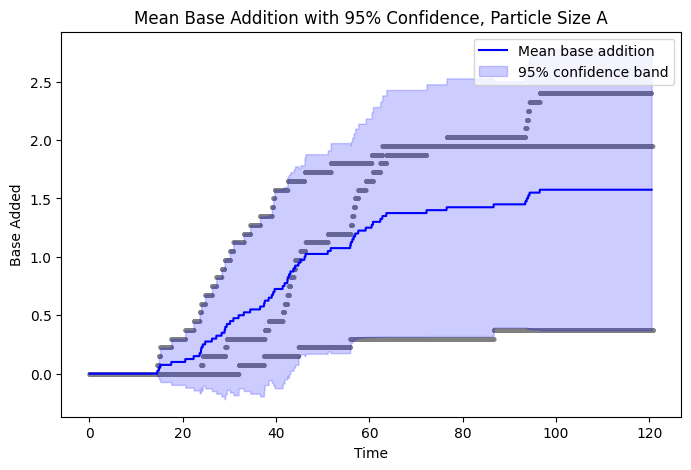

In [250]:
common_time = np.linspace(0,120.5,7000)


a1_interp = np.interp(common_time, atrial1['Time'],atrial1['Base volume'])
a2_interp = np.interp(common_time, atrial2['Time'],atrial2['Base volume'])
a3_interp = np.interp(common_time, atrial3['Time'],atrial3['Base volume'])

#combine into a data frame 
df = pd.DataFrame({'time': common_time,'trial1':a1_interp,'trial2':a2_interp,'trial3': a3_interp})
df['mean'] = df[['trial1','trial2','trial3']].mean(axis=1)
df['sem'] = df[['trial1','trial2','trial3']].sem(axis=1)


# 95% confidence interval
df['upper'] = df['mean'] + 1.96 * df['sem']
df['lower'] = df['mean'] - 1.96 * df['sem']

# Plot
plt.figure(figsize=(8,5))

# Optional: plot original data points faintly
plt.scatter(atrial1['Time'], atrial1['Base volume'], color='gray', alpha=0.4, s=5)
plt.scatter(atrial2['Time'], atrial2['Base volume'], color='gray', alpha=0.4, s=5)
plt.scatter(atrial3['Time'], atrial3['Base volume'], color='gray', alpha=0.4, s=5)

# Plot mean and confidence band
plt.plot(df['time'], df['mean'], color='blue', label='Mean base addition')
plt.fill_between(df['time'], df['lower'], df['upper'], color='blue', alpha=0.2, label='95% confidence band')

plt.xlabel('Time')
plt.ylabel('Base Added')
plt.title('Mean Base Addition with 95% Confidence, Particle Size A')
plt.legend()
plt.show()

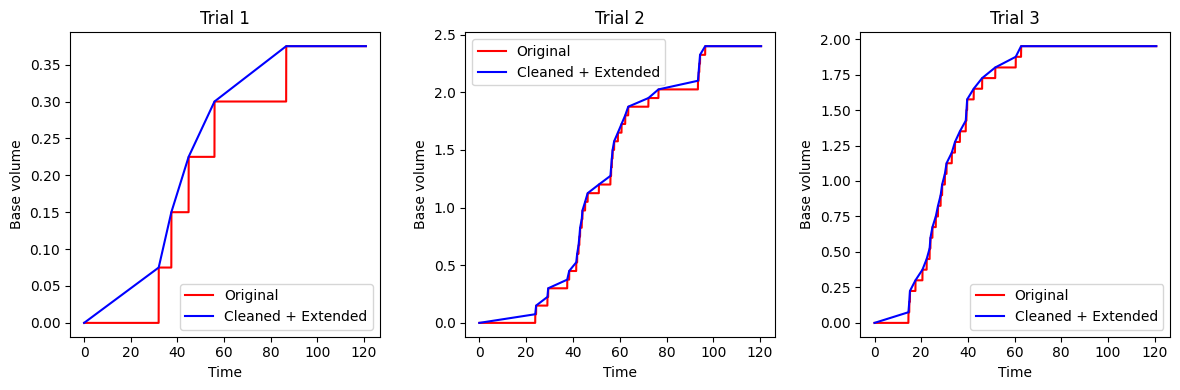

In [251]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, orig, cleaned, title in zip(
    axes,
    [atrial1, atrial2, atrial3],
    [a1_no_dup, a2_no_dup, a3_no_dup],
    ["Trial 1", "Trial 2", "Trial 3"]
):
    ax.plot(orig["Time"], orig["Base volume"], "r-", label="Original")
    ax.plot(cleaned["Time"], cleaned["Base volume"], "b-", label="Cleaned + Extended")
    ax.set_xlabel("Time")
    ax.set_ylabel("Base volume")
    ax.set_title(title)
    ax.legend()

plt.tight_layout()
plt.show()

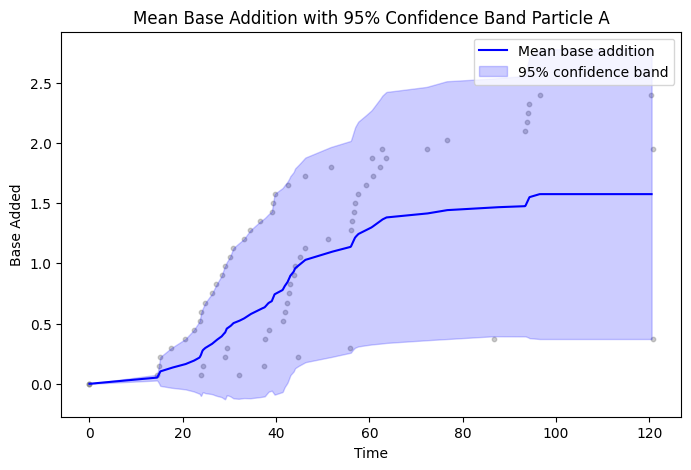

In [252]:
common_time = np.linspace(0,120.5,1000)

#interpolated data points to same time frame 
a1_smoothed_interp = np.interp(common_time, a1_no_dup["Time"],a1_no_dup["Base volume"])
a2_smoothed_interp = np.interp(common_time, a2_no_dup["Time"],a2_no_dup["Base volume"])
a3_smoothed_interp = np.interp(common_time, a3_no_dup["Time"],a3_no_dup["Base volume"])

#combine into a data frame 
df_a_smoothed = pd.DataFrame({'time': common_time,'trial1':a1_smoothed_interp,'trial2':a2_smoothed_interp,'trial3': a3_smoothed_interp})
df_a_smoothed['mean'] = df_a_smoothed[['trial1','trial2','trial3']].mean(axis=1)
df_a_smoothed['sem'] = df_a_smoothed[['trial1','trial2','trial3']].sem(axis=1)


# 95% confidence interval
df_a_smoothed['upper'] = df_a_smoothed['mean'] + 1.96 * df_a_smoothed['sem']
df_a_smoothed['lower'] = df_a_smoothed['mean'] - 1.96 * df_a_smoothed['sem']

# Plot
plt.figure(figsize=(8,5))

# plot original data points faintly
plt.scatter(a1_no_dup["Time"],a1_no_dup["Base volume"], color='gray', alpha=0.4, s=10)
plt.scatter(a2_no_dup["Time"],a2_no_dup["Base volume"], color='gray', alpha=0.4, s=10)
plt.scatter(a3_no_dup["Time"],a3_no_dup["Base volume"], color='gray', alpha=0.4, s=10)

# Plot mean and confidence band
plt.plot(df_a_smoothed['time'], df_a_smoothed['mean'], color='blue', label='Mean base addition')
plt.fill_between(df_a_smoothed['time'], df_a_smoothed['lower'], df_a_smoothed['upper'], color='blue', alpha=0.2, label='95% confidence band')
#plt.plot(HPLC['Time'], HPLC['5a1'], color='green', label='HPLC A trial 1')
#plt.plot(HPLC['Time'], HPLC['5a2'], color='green', label='HPLC A trial 2')
#plt.plot(HPLC['Time'], HPLC['5a3'], color='green', label='HPLC A trial 3')

plt.xlabel('Time')
plt.ylabel('Base Added')
plt.title('Mean Base Addition with 95% Confidence Band Particle A')
plt.legend()
plt.show()

## confidence interval for particle size B
1. original data is first used to plot confidence interval 
2. data with duplicates removed is then used 

In [253]:
btrial1 = pd.DataFrame({"Time": b['Time'], "Base volume": b['Base volume']}).dropna(how='all')
btrial2 = pd.DataFrame({"Time": b['Time.1'], "Base volume": b['Base volume.1']}).dropna(how='all')
btrial3 = pd.DataFrame({"Time": b['Time.2'], "Base volume": b['Base volume.2']}).dropna(how='all')

In [254]:
#1b
last1b = btrial1.iloc[-1].copy()
b1_no_dup = btrial1.drop_duplicates(subset="Base volume", keep="first")
b1_no_dup = pd.concat([b1_no_dup, last1b.to_frame().T], ignore_index=False)

#2b
last2b = btrial2.iloc[-1].copy()
b2_no_dup = btrial2.drop_duplicates(subset="Base volume", keep="first")
b2_no_dup = pd.concat([b2_no_dup, last2b.to_frame().T], ignore_index=False)

#3b
last3b = btrial3.iloc[-1].copy()
b3_no_dup = btrial3.drop_duplicates(subset="Base volume", keep="first")
b3_no_dup = pd.concat([b3_no_dup, last3b.to_frame().T], ignore_index=False)

print(b1_no_dup)
print(b2_no_dup)
print(b3_no_dup)


           Time  Base volume
0       0.00000        0.000
1280   21.37500        0.075
1535   25.63863        0.150
1880   31.41666        0.225
1992   33.29281        0.300
2034   33.99602        0.375
2244   37.51333        0.450
2578   43.10731        0.525
2597   43.42553        0.600
2616   43.74381        0.675
2799   46.80943        0.750
2975   49.75491        0.825
3317   55.47808        0.900
3809   63.71229        0.975
4045   67.66523        1.050
7220  120.84084        1.050
            Time  Base volume
0       0.000056        0.000
1220   20.449230        0.075
1340   22.460730        0.150
1570   26.314180        0.225
1756   29.431620        0.300
2040   34.191780        0.375
2060   34.527040        0.450
2080   34.862270        0.525
2100   35.197510        0.600
2120   35.532730        0.675
2222   37.242370        0.750
2352   39.419420        0.825
2396   40.153500        0.900
2432   40.755420        0.975
2490   41.727610        1.050
2526   42.329830        1.1

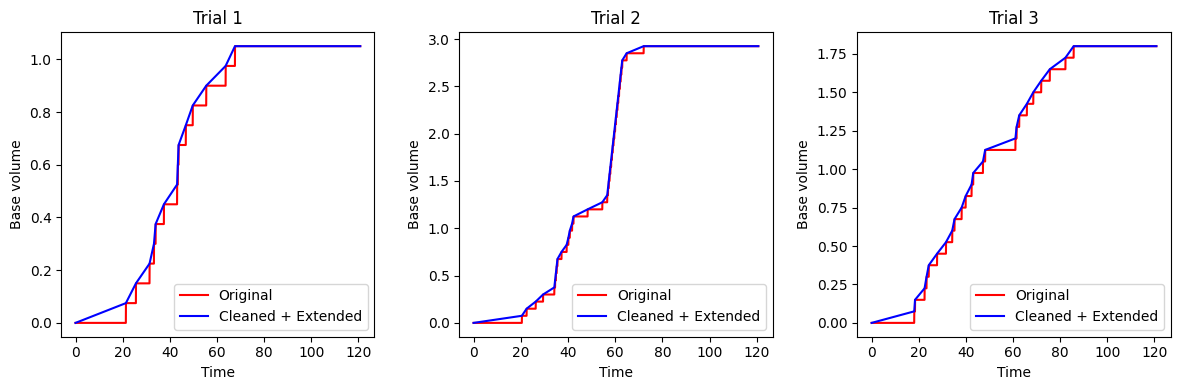

In [255]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, orig, cleaned, title in zip(
    axes,
    [btrial1, btrial2, btrial3],
    [b1_no_dup, b2_no_dup, b3_no_dup],
    ["Trial 1", "Trial 2", "Trial 3"]
):
    ax.plot(orig["Time"], orig["Base volume"], "r-", label="Original")
    ax.plot(cleaned["Time"], cleaned["Base volume"], "b-", label="Cleaned + Extended")
    ax.set_xlabel("Time")
    ax.set_ylabel("Base volume")
    ax.set_title(title)
    ax.legend()

plt.tight_layout()
plt.show()


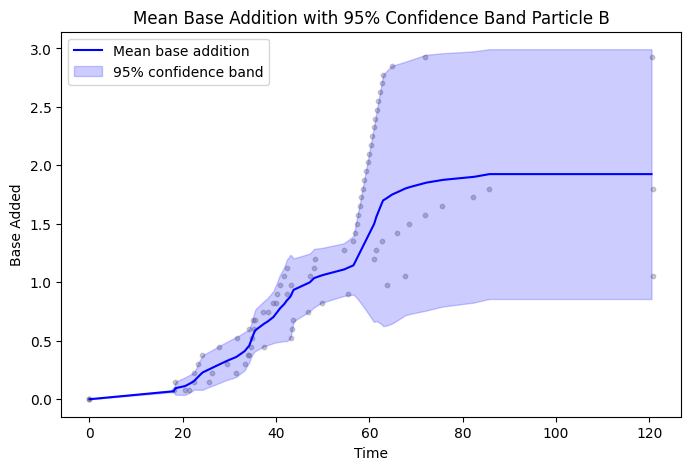

In [256]:
common_time = np.linspace(0,120.5,1000)

b1_smoothed_interp = np.interp(common_time, b1_no_dup["Time"], b1_no_dup["Base volume"])
b2_smoothed_interp = np.interp(common_time, b2_no_dup["Time"], b2_no_dup["Base volume"])
b3_smoothed_interp = np.interp(common_time, b3_no_dup["Time"], b3_no_dup["Base volume"])

# combine into a data frame 
dfb_smoothed = pd.DataFrame({
    'time': common_time,
    'trial1': b1_smoothed_interp,
    'trial2': b2_smoothed_interp,
    'trial3': b3_smoothed_interp
})

dfb_smoothed['mean'] = dfb_smoothed[['trial1','trial2','trial3']].mean(axis=1)
dfb_smoothed['sem'] = dfb_smoothed[['trial1','trial2','trial3']].sem(axis=1)

# 95% confidence interval
dfb_smoothed['upper'] = dfb_smoothed['mean'] + 1.96 * dfb_smoothed['sem']
dfb_smoothed['lower'] = dfb_smoothed['mean'] - 1.96 * dfb_smoothed['sem']

# Plot
plt.figure(figsize=(8,5))

# plot original data points faintly
plt.scatter(b1_no_dup["Time"], b1_no_dup["Base volume"], color='gray', alpha=0.4, s=10)
plt.scatter(b2_no_dup["Time"], b2_no_dup["Base volume"], color='gray', alpha=0.4, s=10)
plt.scatter(b3_no_dup["Time"], b3_no_dup["Base volume"], color='gray', alpha=0.4, s=10)

# Plot mean and confidence band
plt.plot(dfb_smoothed['time'], dfb_smoothed['mean'], color='blue', label='Mean base addition')
plt.fill_between(dfb_smoothed['time'], dfb_smoothed['lower'], dfb_smoothed['upper'], color='blue', alpha=0.2, label='95% confidence band')

plt.xlabel('Time')
plt.ylabel('Base Added')
plt.title('Mean Base Addition with 95% Confidence Band Particle B')
plt.legend()
plt.show()


## confidence interval for particle size C
1. original data is first used to plot confidence interval 
2. data with duplicates removed is then used

In [257]:
ctrial1 = pd.DataFrame({"Time": c['Time'], "Base volume": c['Base volume']}).dropna(how='all')
ctrial2 = pd.DataFrame({"Time": c['Time.1'], "Base volume": c['Base volume.1']}).dropna(how='all')
ctrial3 = pd.DataFrame({"Time": c['Time.2'], "Base volume": c['Base volume.2']}).dropna(how='all')


In [258]:
#1c
last1c = ctrial1.iloc[-1].copy()
c1_no_dup = ctrial1.drop_duplicates(subset="Base volume", keep="first")
c1_no_dup = pd.concat([c1_no_dup, last1c.to_frame().T], ignore_index=False)

#2c
last2c = ctrial2.iloc[-1].copy()
c2_no_dup = ctrial2.drop_duplicates(subset="Base volume", keep="first")
c2_no_dup = pd.concat([c2_no_dup, last2c.to_frame().T], ignore_index=False)

#3c
last3c = ctrial3.iloc[-1].copy()
c3_no_dup = ctrial3.drop_duplicates(subset="Base volume", keep="first")
c3_no_dup = pd.concat([c3_no_dup, last3c.to_frame().T], ignore_index=False)

print(c1_no_dup)
print(c2_no_dup)
print(c3_no_dup)


            Time  Base volume
0       0.000392        0.000
601    10.065960        0.075
666    11.154180        0.150
774    12.963410        0.225
799    13.381810        0.300
876    14.671380        0.375
895    14.989680        0.450
916    15.341920        0.525
937    15.693410        0.600
1055   17.669530        0.675
1153   19.311480        0.750
1296   21.706460        0.825
1347   22.560910        0.900
2316   38.776940        0.975
2335   39.094930        1.050
2356   39.447330        1.125
2791   46.732720        1.200
3182   53.281090        1.275
3201   53.599360        1.350
3220   53.917610        1.425
3239   54.235890        1.500
3258   54.554150        1.575
3277   54.872420        1.650
3296   55.190690        1.725
3315   55.508960        1.800
3334   55.827230        1.875
3353   56.145500        1.950
3372   56.463770        2.025
3391   56.782040        2.100
3744   62.693240        2.175
7266  121.660770        2.175
            Time  Base volume
0       0.

In [259]:
print(c1_no_dup.info)

<bound method DataFrame.info of             Time  Base volume
0       0.000392        0.000
601    10.065960        0.075
666    11.154180        0.150
774    12.963410        0.225
799    13.381810        0.300
876    14.671380        0.375
895    14.989680        0.450
916    15.341920        0.525
937    15.693410        0.600
1055   17.669530        0.675
1153   19.311480        0.750
1296   21.706460        0.825
1347   22.560910        0.900
2316   38.776940        0.975
2335   39.094930        1.050
2356   39.447330        1.125
2791   46.732720        1.200
3182   53.281090        1.275
3201   53.599360        1.350
3220   53.917610        1.425
3239   54.235890        1.500
3258   54.554150        1.575
3277   54.872420        1.650
3296   55.190690        1.725
3315   55.508960        1.800
3334   55.827230        1.875
3353   56.145500        1.950
3372   56.463770        2.025
3391   56.782040        2.100
3744   62.693240        2.175
7266  121.660770        2.175>


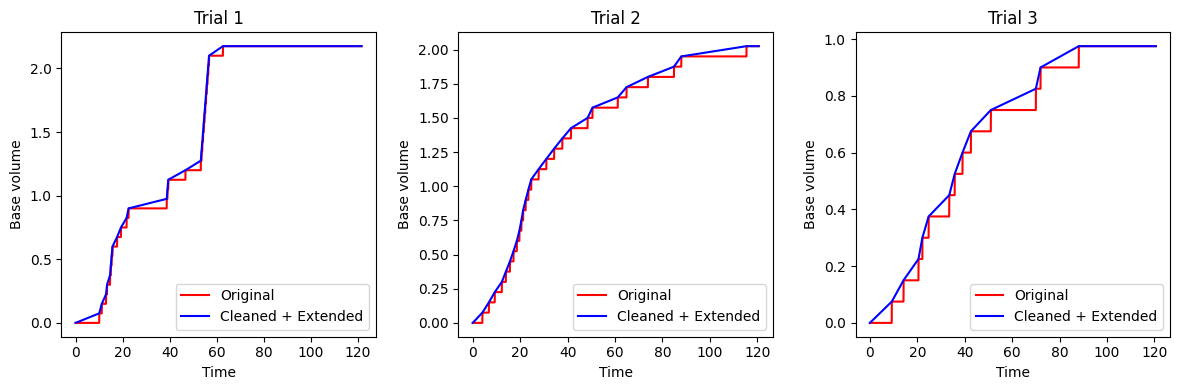

In [260]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, orig, cleaned, title in zip(
    axes,
    [ctrial1, ctrial2, ctrial3],
    [c1_no_dup, c2_no_dup, c3_no_dup],
    ["Trial 1", "Trial 2", "Trial 3"]
):
    ax.plot(orig["Time"], orig["Base volume"], "r-", label="Original")
    ax.plot(cleaned["Time"], cleaned["Base volume"], "b-", label="Cleaned + Extended")
    ax.set_xlabel("Time")
    ax.set_ylabel("Base volume")
    ax.set_title(title)
    ax.legend()

plt.tight_layout()
plt.show()


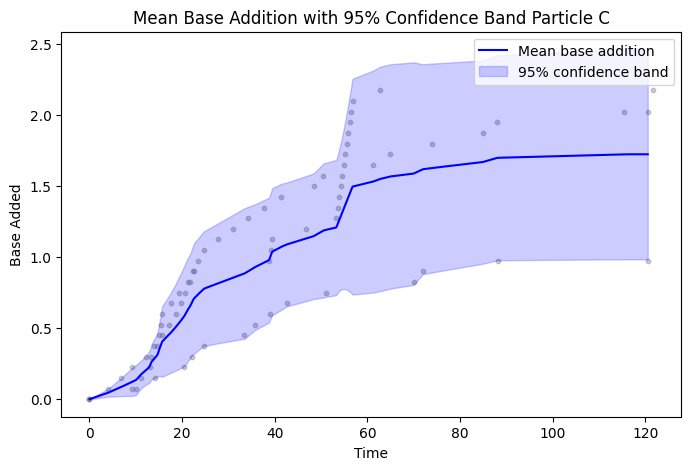

In [261]:
common_time = np.linspace(0, 120.5, 1000)

c1_smoothed_interp = np.interp(common_time, c1_no_dup["Time"], c1_no_dup["Base volume"])
c2_smoothed_interp = np.interp(common_time, c2_no_dup["Time"], c2_no_dup["Base volume"])
c3_smoothed_interp = np.interp(common_time, c3_no_dup["Time"], c3_no_dup["Base volume"])

# Combine into a data frame 
dfc_smoothed = pd.DataFrame({
    'time': common_time,
    'trial1': c1_smoothed_interp,
    'trial2': c2_smoothed_interp,
    'trial3': c3_smoothed_interp
})

dfc_smoothed['mean'] = dfc_smoothed[['trial1', 'trial2', 'trial3']].mean(axis=1)
dfc_smoothed['sem'] = dfc_smoothed[['trial1', 'trial2', 'trial3']].sem(axis=1)

# 95% confidence interval
dfc_smoothed['upper'] = dfc_smoothed['mean'] + 1.96 * dfc_smoothed['sem']
dfc_smoothed['lower'] = dfc_smoothed['mean'] - 1.96 * dfc_smoothed['sem']

# Plot
plt.figure(figsize=(8, 5))

# Plot original data points faintly
plt.scatter(c1_no_dup["Time"], c1_no_dup["Base volume"], color='gray', alpha=0.4, s=10)
plt.scatter(c2_no_dup["Time"], c2_no_dup["Base volume"], color='gray', alpha=0.4, s=10)
plt.scatter(c3_no_dup["Time"], c3_no_dup["Base volume"], color='gray', alpha=0.4, s=10)

# Plot mean and confidence band
plt.plot(dfc_smoothed['time'], dfc_smoothed['mean'], color='blue', label='Mean base addition')
plt.fill_between(dfc_smoothed['time'], dfc_smoothed['lower'], dfc_smoothed['upper'], color='blue', alpha=0.2, label='95% confidence band')

plt.xlabel('Time')
plt.ylabel('Base Added')
plt.title('Mean Base Addition with 95% Confidence Band Particle C')
plt.legend()
plt.show()



## confidence interval for particle size D
1. original data is first used to plot confidence interval 
2. data with duplicates removed is then used

In [262]:
dtrial1 = pd.DataFrame({"Time": d['Time'], "Base volume": d['Base volume']}).dropna(how='all')
dtrial2 = pd.DataFrame({"Time": d['Time.1'], "Base volume": d['Base volume.1']}).dropna(how='all')
dtrial3 = pd.DataFrame({"Time": d['Time.2'], "Base volume": d['Base volume.2']}).dropna(how='all')


In [263]:
#1d
last1d = dtrial1.iloc[-1].copy()
d1_no_dup = dtrial1.drop_duplicates(subset="Base volume", keep="first")
d1_no_dup = pd.concat([d1_no_dup, last1d.to_frame().T], ignore_index=False)

#2d
last2d = dtrial2.iloc[-1].copy()
d2_no_dup = dtrial2.drop_duplicates(subset="Base volume", keep="first")
d2_no_dup = pd.concat([d2_no_dup, last2d.to_frame().T], ignore_index=False)

#3d
last3d = dtrial3.iloc[-1].copy()
d3_no_dup = dtrial3.drop_duplicates(subset="Base volume", keep="first")
d3_no_dup = pd.concat([d3_no_dup, last3d.to_frame().T], ignore_index=False)

print(d1_no_dup)
print(d2_no_dup)
print(d3_no_dup)


            Time  Base volume
0       0.000053        0.000
910    15.240890        0.075
929    15.559030        0.150
1176   19.696000        0.225
1240   20.768230        0.300
1341   22.460080        0.375
1540   25.790680        0.450
1637   27.414040        0.525
2067   34.609910        0.600
7258  121.526380        0.600
            Time  Base volume
0       0.000061        0.000
980    16.426010        0.075
1350   22.628130        0.150
1732   29.025620        0.225
1766   29.595530        0.300
1936   32.444910        0.375
2030   34.020440        0.450
2156   36.132440        0.525
2318   38.847660        0.600
2416   40.483530        0.675
2480   41.556260        0.750
2648   44.370440        0.825
2698   45.208470        0.900
2888   48.392010        0.975
3012   50.462070        1.050
3722   62.361290        1.125
7198  120.598080        1.125
            Time  Base volume
0       0.000628        0.000
560     9.386140        0.075
586     9.821900        0.150
642    10.

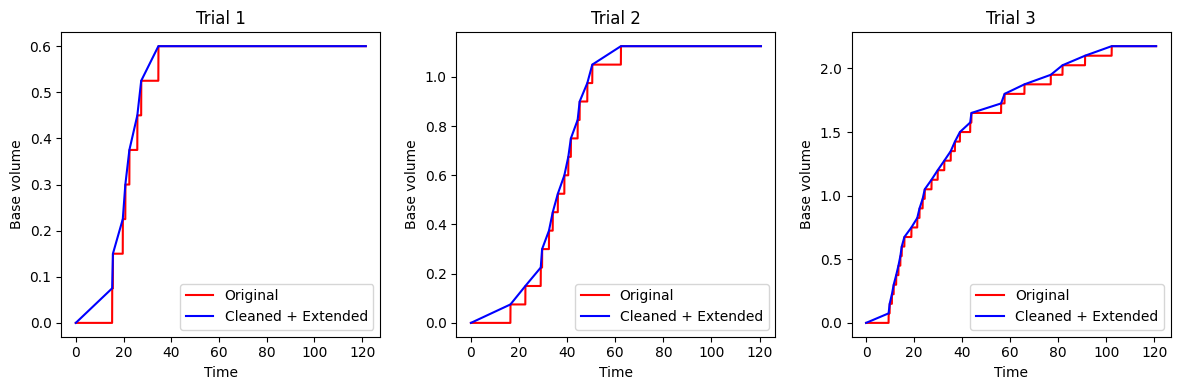

In [264]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, orig, cleaned, title in zip(
    axes,
    [dtrial1, dtrial2, dtrial3],
    [d1_no_dup, d2_no_dup, d3_no_dup],
    ["Trial 1", "Trial 2", "Trial 3"]
):
    ax.plot(orig["Time"], orig["Base volume"], "r-", label="Original")
    ax.plot(cleaned["Time"], cleaned["Base volume"], "b-", label="Cleaned + Extended")
    ax.set_xlabel("Time")
    ax.set_ylabel("Base volume")
    ax.set_title(title)
    ax.legend()

plt.tight_layout()
plt.show()


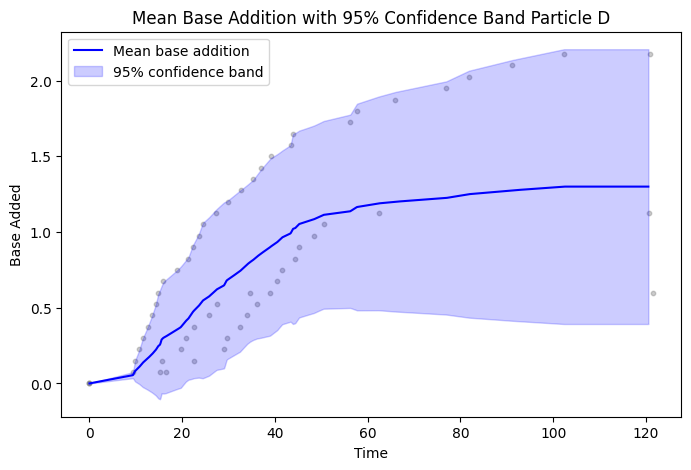

In [265]:
common_time = np.linspace(0, 120.5, 1000)

d1_smoothed_interp = np.interp(common_time, d1_no_dup["Time"], d1_no_dup["Base volume"])
d2_smoothed_interp = np.interp(common_time, d2_no_dup["Time"], d2_no_dup["Base volume"])
d3_smoothed_interp = np.interp(common_time, d3_no_dup["Time"], d3_no_dup["Base volume"])

# Combine into a data frame 
dfd_smoothed = pd.DataFrame({
    'time': common_time,
    'trial1': d1_smoothed_interp,
    'trial2': d2_smoothed_interp,
    'trial3': d3_smoothed_interp
})

dfd_smoothed['mean'] = dfd_smoothed[['trial1', 'trial2', 'trial3']].mean(axis=1)
dfd_smoothed['sem'] = dfd_smoothed[['trial1', 'trial2', 'trial3']].sem(axis=1)

# 95% confidence interval
dfd_smoothed['upper'] = dfd_smoothed['mean'] + 1.96 * dfd_smoothed['sem']
dfd_smoothed['lower'] = dfd_smoothed['mean'] - 1.96 * dfd_smoothed['sem']

# Plot
plt.figure(figsize=(8, 5))

# Plot original data points faintly
plt.scatter(d1_no_dup["Time"], d1_no_dup["Base volume"], color='gray', alpha=0.4, s=10)
plt.scatter(d2_no_dup["Time"], d2_no_dup["Base volume"], color='gray', alpha=0.4, s=10)
plt.scatter(d3_no_dup["Time"], d3_no_dup["Base volume"], color='gray', alpha=0.4, s=10)

# Plot mean and confidence band
plt.plot(dfd_smoothed['time'], dfd_smoothed['mean'], color='blue', label='Mean base addition')
plt.fill_between(dfd_smoothed['time'], dfd_smoothed['lower'], dfd_smoothed['upper'], color='blue', alpha=0.2, label='95% confidence band')

plt.xlabel('Time')
plt.ylabel('Base Added')
plt.title('Mean Base Addition with 95% Confidence Band Particle D')
plt.legend()
plt.show()




## confidence interval for particle size E
1. original data is first used to plot confidence interval 
2. data with duplicates removed is then used

In [266]:
etrial1 = pd.DataFrame({"Time": e['Time'], "Base volume": e['Base volume']}).dropna(how='all')
etrial2 = pd.DataFrame({"Time": e['Time.1'], "Base volume": e['Base volume.1']}).dropna(how='all')
etrial3 = pd.DataFrame({"Time": e['Time.2'], "Base volume": e['Base volume.2']}).dropna(how='all')


In [267]:
#1e
last1e = etrial1.iloc[-1].copy()
e1_no_dup = etrial1.drop_duplicates(subset="Base volume", keep="first")
e1_no_dup = pd.concat([e1_no_dup, last1e.to_frame().T], ignore_index=False)

#2e
last2e = etrial2.iloc[-1].copy()
e2_no_dup = etrial2.drop_duplicates(subset="Base volume", keep="first")
e2_no_dup = pd.concat([e2_no_dup, last2e.to_frame().T], ignore_index=False)

#3e
last3e = etrial3.iloc[-1].copy()
e3_no_dup = etrial3.drop_duplicates(subset="Base volume", keep="first")
e3_no_dup = pd.concat([e3_no_dup, last3e.to_frame().T], ignore_index=False)

print(e1_no_dup)
print(e2_no_dup)
print(e3_no_dup)


            Time  Base volume
0       0.000053        0.000
218     3.650780        0.075
271     4.538700        0.150
296     4.957010        0.225
336     5.626840        0.300
381     6.381310        0.375
434     7.268920        0.450
524     8.775730        0.525
548     9.178390        0.600
626    10.484880        0.675
670    11.221620        0.750
689    11.539890        0.825
708    11.858110        0.900
727    12.176290        0.975
746    12.494580        1.050
767    12.846180        1.125
826    13.834310        1.200
854    14.303730        1.275
945    15.827780        1.350
1044   17.485600        1.425
1182   19.797360        1.500
1346   22.544030        1.575
1591   26.644680        1.650
1711   28.652640        1.725
7255  121.476630        1.725
            Time  Base volume
0       0.000053        0.000
236     3.954170        0.075
386     6.468280        0.150
514     8.613690        0.225
568     9.518950        0.300
588     9.854240        0.375
710    11.

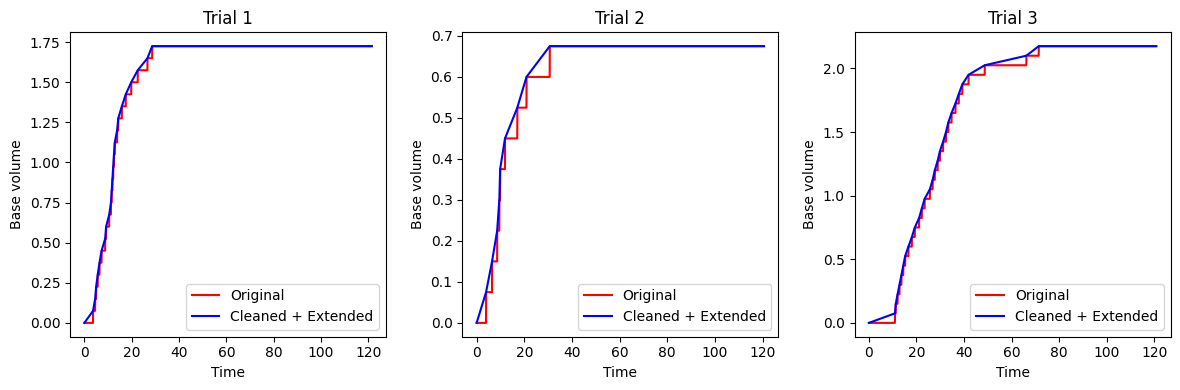

In [268]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, orig, cleaned, title in zip(
    axes,
    [etrial1, etrial2, etrial3],
    [e1_no_dup, e2_no_dup, e3_no_dup],
    ["Trial 1", "Trial 2", "Trial 3"]
):
    ax.plot(orig["Time"], orig["Base volume"], "r-", label="Original")
    ax.plot(cleaned["Time"], cleaned["Base volume"], "b-", label="Cleaned + Extended")
    ax.set_xlabel("Time")
    ax.set_ylabel("Base volume")
    ax.set_title(title)
    ax.legend()

plt.tight_layout()
plt.show()


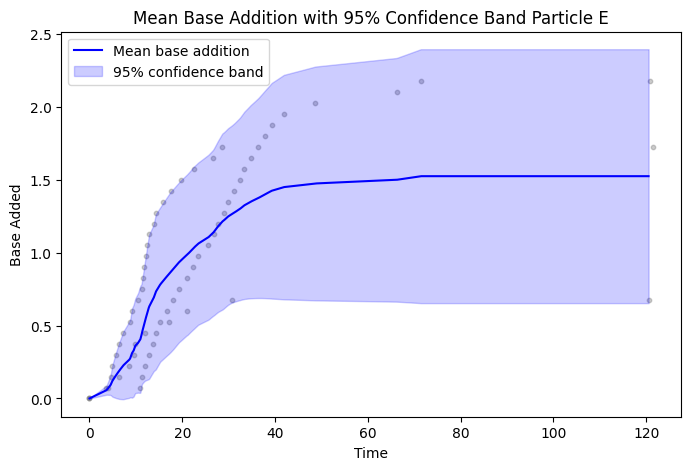

In [269]:

common_time = np.linspace(0, 120.5, 1000)

e1_smoothed_interp = np.interp(common_time, e1_no_dup["Time"], e1_no_dup["Base volume"])
e2_smoothed_interp = np.interp(common_time, e2_no_dup["Time"], e2_no_dup["Base volume"])
e3_smoothed_interp = np.interp(common_time, e3_no_dup["Time"], e3_no_dup["Base volume"])

# Combine into a data frame 
dfe_smoothed = pd.DataFrame({
    'time': common_time,
    'trial1': e1_smoothed_interp,
    'trial2': e2_smoothed_interp,
    'trial3': e3_smoothed_interp
})

dfe_smoothed['mean'] = dfe_smoothed[['trial1', 'trial2', 'trial3']].mean(axis=1)
dfe_smoothed['sem'] = dfe_smoothed[['trial1', 'trial2', 'trial3']].sem(axis=1)

# 95% confidence interval
dfe_smoothed['upper'] = dfe_smoothed['mean'] + 1.96 * dfe_smoothed['sem']
dfe_smoothed['lower'] = dfe_smoothed['mean'] - 1.96 * dfe_smoothed['sem']

# Plot
plt.figure(figsize=(8, 5))

# Plot original data points faintly
plt.scatter(e1_no_dup["Time"], e1_no_dup["Base volume"], color='gray', alpha=0.4, s=10)
plt.scatter(e2_no_dup["Time"], e2_no_dup["Base volume"], color='gray', alpha=0.4, s=10)
plt.scatter(e3_no_dup["Time"], e3_no_dup["Base volume"], color='gray', alpha=0.4, s=10)

# Plot mean and confidence band
plt.plot(dfe_smoothed['time'], dfe_smoothed['mean'], color='blue', label='Mean base addition')
plt.fill_between(dfe_smoothed['time'], dfe_smoothed['lower'], dfe_smoothed['upper'], color='blue', alpha=0.2, label='95% confidence band')

plt.xlabel('Time')
plt.ylabel('Base Added')
plt.title('Mean Base Addition with 95% Confidence Band Particle E')
plt.legend()
plt.show()




# Plotting HPLC data within the confidence interval 


### Dataframes reference 
- df_a_smoothed 
- dfb_smoothed 
- dfc_smoothed 
- dfd_smoothed 
- dfe_smoothed 

In [270]:
df_a_smoothed.head()

,time,trial1,trial2,trial3,mean,sem,upper,lower
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.120621,0.000283,0.000378,0.000623,0.000428,0.000101,0.000626,0.000230
2,0.241241,0.000566,0.000757,0.001245,0.000856,0.000202,0.001253,0.000459
3,0.361862,0.000849,0.001136,0.001868,0.001284,0.000304,0.001879,0.000689
4,0.482482,0.001132,0.001514,0.002491,0.001712,0.000405,0.002506,0.000919


In [271]:
dfb_smoothed.head()

,time,trial1,trial2,trial3,mean,sem,upper,lower
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.120621,0.000423,0.000442,0.000500,0.000455,0.000023,0.000501,0.000410
2,0.241241,0.000846,0.000885,0.001001,0.000911,0.000047,0.001002,0.000820
3,0.361862,0.001270,0.001327,0.001502,0.001366,0.000070,0.001503,0.001229
4,0.482482,0.001693,0.001769,0.002003,0.001822,0.000093,0.002004,0.001639


45.45% of HPLC points lie within the 95% confidence interval.


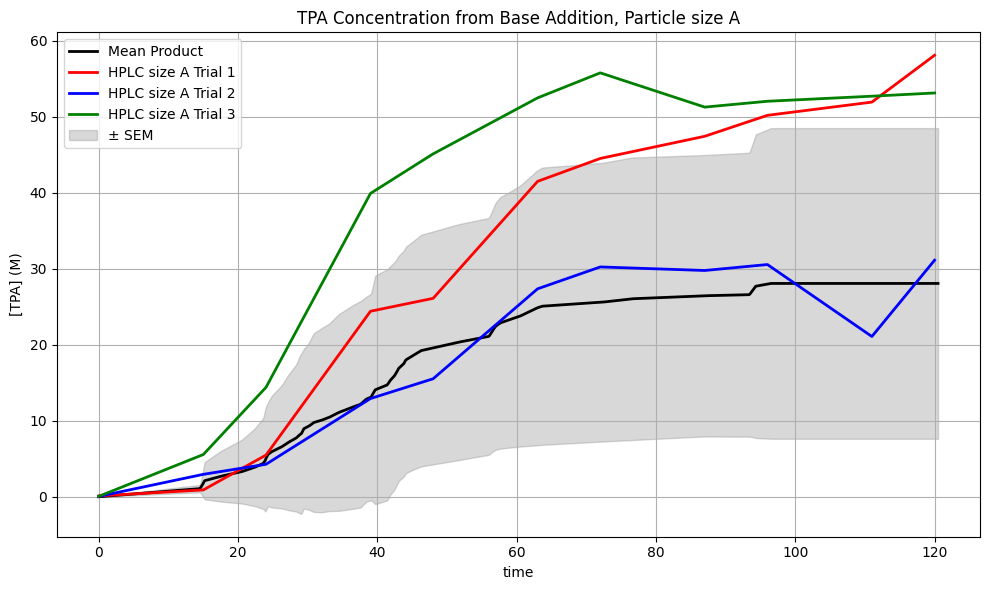

In [272]:
# add another column with mean converted to product using formula 
# product , upper_product , lower_product 
# Plot HPLC data in the same figure 

# constants
OH_stock_M = 0.5        # M
V_reactor_mL = 12.0     # mL
stoich_TPA_per_OH = 0.5 # [TPA] = 2 * [OH-]_reactor

# Convert base volume (mL) to TPA concentration for each trial
for i, col in enumerate(['trial1', 'trial2', 'trial3'], start=1):
    V_base = df_a_smoothed[col].astype(float)
    df_a_smoothed[f'product{i}a'] = stoich_TPA_per_OH * (OH_stock_M * V_base / (V_reactor_mL + V_base)) * 1000

# Calculate mean and SEM across the three product columns
product_cols = [f'product{i}a' for i in range(1, 4)]
df_a_smoothed['product_mean'] = df_a_smoothed[product_cols].mean(axis=1)
df_a_smoothed['product_sem'] = df_a_smoothed[product_cols].std(axis=1, ddof=1) / np.sqrt(len(product_cols))

# Upper and lower bounds
df_a_smoothed['upper_product'] = df_a_smoothed['product_mean'] + 1.96 * df_a_smoothed['product_sem']
df_a_smoothed['lower_product'] = df_a_smoothed['product_mean'] - 1.96 * df_a_smoothed['product_sem']

# --- Calculate % of HPLC points within confidence interval ---
# First, interpolate the CI bounds to match HPLC time points
lower_interp = np.interp(HPLC['Time'], df_a_smoothed['time'], df_a_smoothed['lower_product'])
upper_interp = np.interp(HPLC['Time'], df_a_smoothed['time'], df_a_smoothed['upper_product'])

# Combine all three HPLC trials into one check
HPLC_trials = ['5a1', '5a2', '5a3']
within_counts = 0
total_counts = 0

for trial in HPLC_trials:
    values = HPLC[trial].values
    within = (values >= lower_interp) & (values <= upper_interp)
    within_counts += np.sum(within)
    total_counts += len(values)

percent_within_CI = (within_counts / total_counts) * 100

print(f"{percent_within_CI:.2f}% of HPLC points lie within the 95% confidence interval.")



# --- Plot ---
plt.figure(figsize=(10,6))

'''
# Plot individual trials
for i in range(1, 4):
    plt.plot(df_a_smoothed['time'], df_a_smoothed[f'product{i}a'], 
             label=f'Product Trial {i}', alpha=0.7)
'''



# Plot mean line
plt.plot(df_a_smoothed['time'], df_a_smoothed['product_mean'], 
         color='black', linewidth=2, label='Mean Product')

#Plotting HPLC data size A , trial 1 , 2 and 3 
plt.plot(HPLC['Time'], HPLC['5a1'], 
         color='red', linewidth=2, label='HPLC size A Trial 1')
plt.plot(HPLC['Time'], HPLC['5a2'], 
         color='blue', linewidth=2, label='HPLC size A Trial 2')
plt.plot(HPLC['Time'], HPLC['5a3'], 
         color='green', linewidth=2, label='HPLC size A Trial 3')

# Plot shaded SEM confidence band
plt.fill_between(df_a_smoothed['time'],
                 df_a_smoothed['lower_product'],
                 df_a_smoothed['upper_product'],
                 color='gray', alpha=0.3, label='± SEM')

plt.xlabel('time')
plt.ylabel('[TPA] (M)')
plt.title('TPA Concentration from Base Addition, Particle size A')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [273]:
df_a_smoothed.head(20)

,time,trial1,trial2,trial3,mean,sem,upper,lower,product1a,product2a,product3a,product_mean,product_sem,upper_product,lower_product
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.120621,0.000283,0.000378,0.000623,0.000428,0.000101,0.000626,0.000230,0.005890,0.007884,0.012969,0.008914,0.002107,0.013045,0.004784
2,0.241241,0.000566,0.000757,0.001245,0.000856,0.000202,0.001253,0.000459,0.011784,0.015770,0.025943,0.017832,0.004215,0.026094,0.009571
3,0.361862,0.000849,0.001136,0.001868,0.001284,0.000304,0.001879,0.000689,0.017678,0.023656,0.038915,0.026750,0.006323,0.039142,0.014357
4,0.482482,0.001132,0.001514,0.002491,0.001712,0.000405,0.002506,0.000919,0.023571,0.031542,0.051885,0.035666,0.008430,0.052188,0.019144
5,0.603103,0.001414,0.001893,0.003114,0.002140,0.000506,0.003132,0.001149,0.029464,0.039427,0.064855,0.044582,0.010536,0.065234,0.023931
6,0.723724,0.001697,0.002271,0.003737,0.002568,0.000607,0.003758,0.001378,0.035357,0.047312,0.077823,0.053497,0.012643,0.078277,0.028717
7,0.844344,0.001980,0.002650,0.004359,0.002997,0.000708,0.004385,0.001608,0.041250,0.055196,0.090790,0.062412,0.014749,0.091320,0.033504
8,0.964965,0.002263,0.003029,0.004982,0.003425,0.000810,0.005011,0.001838,0.047142,0.063080,0.103755,0.071325,0.016855,0.104361,0.038290
9,1.085586,0.002546,0.003407,0.005605,0.003853,0.000911,0.005638,0.002068,0.053034,0.070963,0.116719,0.080239,0.018960,0.117401,0.043076


12.12% of HPLC points lie within the 95% confidence interval.


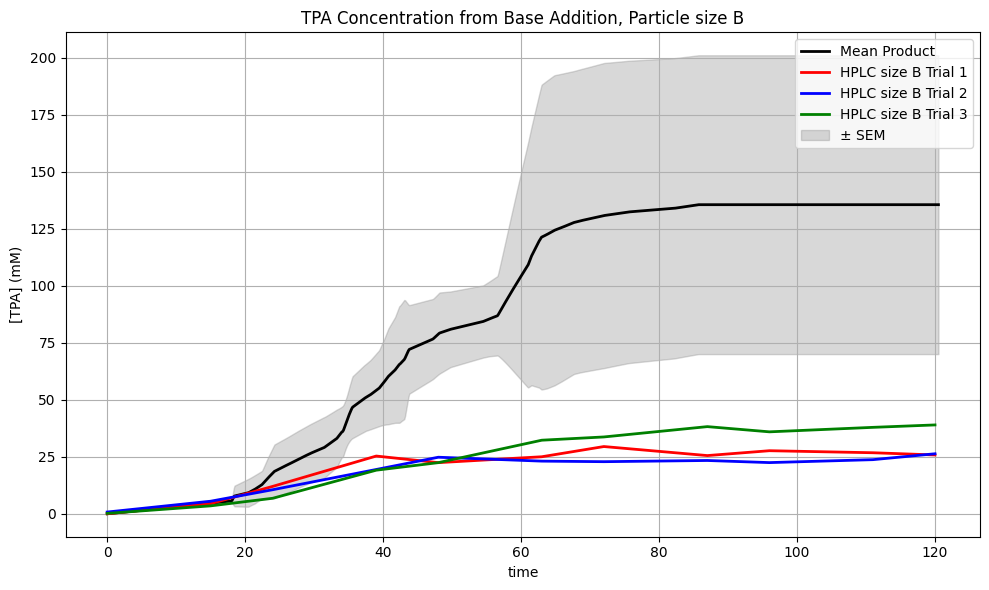

In [274]:
# constants
OH_stock_M = 0.5        # M
V_reactor_mL = 12.0     # mL
stoich_TPA_per_OH = 2.0 # [TPA] = 2 * [OH-]_reactor

# Convert base volume (mL) to TPA concentration for each trial
for i, col in enumerate(['trial1', 'trial2', 'trial3'], start=1):
    V_base = dfb_smoothed[col].astype(float)
    dfb_smoothed[f'product{i}b'] = stoich_TPA_per_OH * (OH_stock_M * V_base / (V_reactor_mL + V_base)) * 1000

# Calculate mean and SEM across the three product columns
product_cols = [f'product{i}b' for i in range(1, 4)]
dfb_smoothed['product_mean'] = dfb_smoothed[product_cols].mean(axis=1)
dfb_smoothed['product_sem'] = dfb_smoothed[product_cols].std(axis=1, ddof=1) / np.sqrt(len(product_cols))

# Upper and lower bounds
dfb_smoothed['upper_product'] = dfb_smoothed['product_mean'] + 1.96 * dfb_smoothed['product_sem']
dfb_smoothed['lower_product'] = dfb_smoothed['product_mean'] - 1.96 * dfb_smoothed['product_sem']

# --- Plot ---
plt.figure(figsize=(10,6))

'''
# Plot individual trials
for i in range(1, 3):
    plt.plot(dfb_smoothed['time'], dfb_smoothed[f'product{i}b'], 
             label=f'Product Trial {i}', alpha=0.7)
'''

# --- Calculate % of HPLC points within confidence interval ---
# First, interpolate the CI bounds to match HPLC time points
lower_interp = np.interp(HPLC['Time'], dfb_smoothed['time'], dfb_smoothed['lower_product'])
upper_interp = np.interp(HPLC['Time'], dfb_smoothed['time'], dfb_smoothed['upper_product'])

# Combine all three HPLC trials into one check
HPLC_trials = ['5b1', '5b2', '5b3']
within_counts = 0
total_counts = 0

for trial in HPLC_trials:
    values = HPLC[trial].values
    within = (values >= lower_interp) & (values <= upper_interp)
    within_counts += np.sum(within)
    total_counts += len(values)

percent_within_CI = (within_counts / total_counts) * 100

print(f"{percent_within_CI:.2f}% of HPLC points lie within the 95% confidence interval.")


# Plot mean line
plt.plot(dfb_smoothed['time'], dfb_smoothed['product_mean'], 
         color='black', linewidth=2, label='Mean Product')

# Plot HPLC data for size B, trial 1, 2, and 3
plt.plot(HPLC['Time'], HPLC['5b1'], 
         color='red', linewidth=2, label='HPLC size B Trial 1')
plt.plot(HPLC['Time'], HPLC['5b2'], 
         color='blue', linewidth=2, label='HPLC size B Trial 2')
plt.plot(HPLC['Time'], HPLC['5b3'], 
         color='green', linewidth=2, label='HPLC size B Trial 3')

# Plot shaded SEM confidence band
plt.fill_between(dfb_smoothed['time'],
                 dfb_smoothed['lower_product'],
                 dfb_smoothed['upper_product'],
                 color='gray', alpha=0.3, label='± SEM')

plt.xlabel('time')
plt.ylabel('[TPA] (mM)')
plt.title('TPA Concentration from Base Addition, Particle size B')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


0.00% of HPLC points lie within the 95% confidence interval.


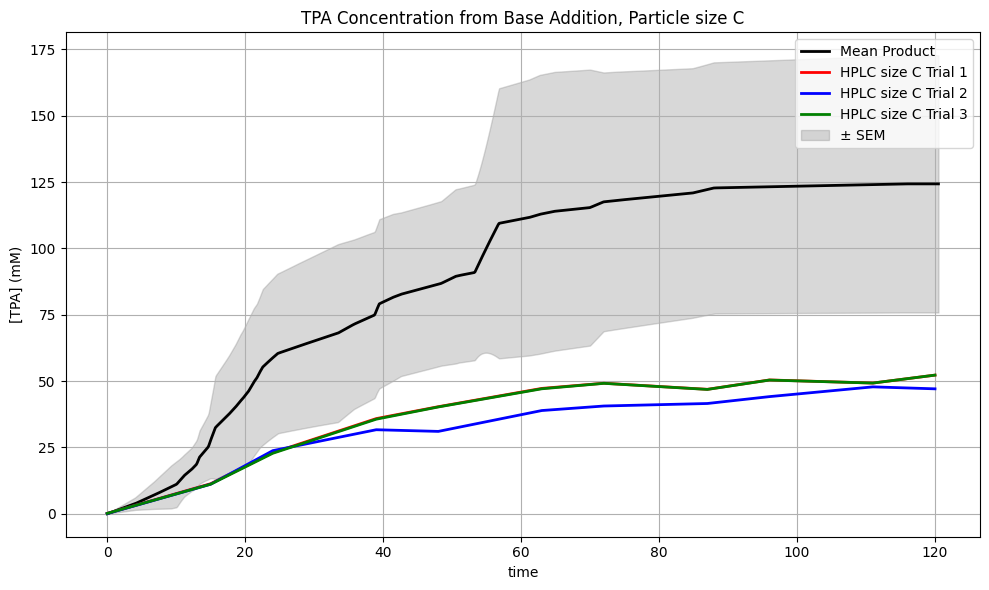

In [275]:
# constants
OH_stock_M = 0.5        # M
V_reactor_mL = 12.0     # mL
stoich_TPA_per_OH = 2.0 # [TPA] = 2 * [OH-]_reactor

# Convert base volume (mL) to TPA concentration for each trial
for i, col in enumerate(['trial1', 'trial2', 'trial3'], start=1):
    V_base = dfc_smoothed[col].astype(float)
    dfc_smoothed[f'product{i}c'] = stoich_TPA_per_OH * (OH_stock_M * V_base / (V_reactor_mL + V_base)) * 1000

# Calculate mean and SEM across the three product columns
product_cols = [f'product{i}c' for i in range(1, 4)]
dfc_smoothed['product_mean'] = dfc_smoothed[product_cols].mean(axis=1)
dfc_smoothed['product_sem'] = dfc_smoothed[product_cols].std(axis=1, ddof=1) / np.sqrt(len(product_cols))

# Upper and lower bounds
dfc_smoothed['upper_product'] = dfc_smoothed['product_mean'] + 1.96 * dfc_smoothed['product_sem']
dfc_smoothed['lower_product'] = dfc_smoothed['product_mean'] - 1.96 * dfc_smoothed['product_sem']

# --- Calculate % of HPLC points within confidence interval ---
# First, interpolate the CI bounds to match HPLC time points
lower_interp = np.interp(HPLC['Time'], dfc_smoothed['time'], dfc_smoothed['lower_product'])
upper_interp = np.interp(HPLC['Time'], dfc_smoothed['time'], dfc_smoothed['upper_product'])

# Combine all three HPLC trials into one check
HPLC_trials = ['5c1', '5c2', '5c3']
within_counts = 0
total_counts = 0

for trial in HPLC_trials:
    values = HPLC[trial].values
    within = (values >= lower_interp) & (values <= upper_interp)
    within_counts += np.sum(within)
    total_counts += len(values)

percent_within_CI = (within_counts / total_counts) * 100

print(f"{percent_within_CI:.2f}% of HPLC points lie within the 95% confidence interval.")




# --- Plot ---
plt.figure(figsize=(10,6))

# Plot mean line
plt.plot(dfc_smoothed['time'], dfc_smoothed['product_mean'], 
         color='black', linewidth=2, label='Mean Product')

# Plot HPLC data for size C
plt.plot(HPLC['Time'], HPLC['5c1'], color='red', linewidth=2, label='HPLC size C Trial 1')
plt.plot(HPLC['Time'], HPLC['5c2'], color='blue', linewidth=2, label='HPLC size C Trial 2')
plt.plot(HPLC['Time'], HPLC['5c3'], color='green', linewidth=2, label='HPLC size C Trial 3')

# Plot shaded SEM confidence band
plt.fill_between(dfc_smoothed['time'],
                 dfc_smoothed['lower_product'],
                 dfc_smoothed['upper_product'],
                 color='gray', alpha=0.3, label='± SEM')

plt.xlabel('time')
plt.ylabel('[TPA] (mM)')
plt.title('TPA Concentration from Base Addition, Particle size C')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


69.70% of HPLC points lie within the 95% confidence interval.


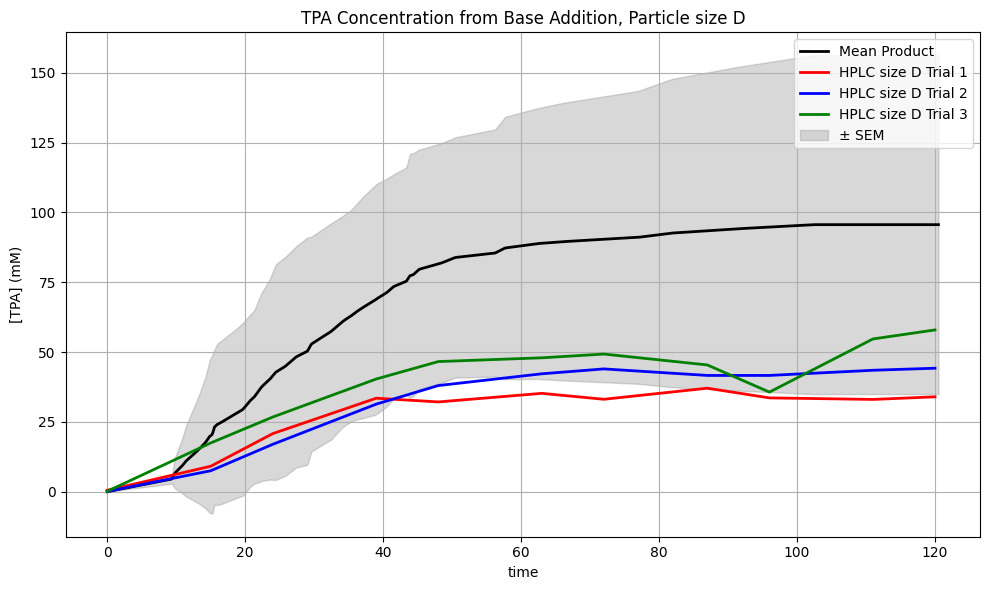

In [276]:
# constants
OH_stock_M = 0.5        # M
V_reactor_mL = 12.0     # mL
stoich_TPA_per_OH = 2.0 # [TPA] = 2 * [OH-]_reactor

for i, col in enumerate(['trial1', 'trial2', 'trial3'], start=1):
    V_base = dfd_smoothed[col].astype(float)
    dfd_smoothed[f'product{i}d'] = stoich_TPA_per_OH * (OH_stock_M * V_base / (V_reactor_mL + V_base)) * 1000

product_cols = [f'product{i}d' for i in range(1, 4)]
dfd_smoothed['product_mean'] = dfd_smoothed[product_cols].mean(axis=1)
dfd_smoothed['product_sem'] = dfd_smoothed[product_cols].std(axis=1, ddof=1) / np.sqrt(len(product_cols))

dfd_smoothed['upper_product'] = dfd_smoothed['product_mean'] + 1.96 * dfd_smoothed['product_sem']
dfd_smoothed['lower_product'] = dfd_smoothed['product_mean'] - 1.96 * dfd_smoothed['product_sem']



# --- Calculate % of HPLC points within confidence interval ---
# First, interpolate the CI bounds to match HPLC time points
lower_interp = np.interp(HPLC['Time'], dfd_smoothed['time'], dfd_smoothed['lower_product'])
upper_interp = np.interp(HPLC['Time'], dfd_smoothed['time'], dfd_smoothed['upper_product'])

# Combine all three HPLC trials into one check
HPLC_trials = ['5d1', '5d2', '5d3']
within_counts = 0
total_counts = 0

for trial in HPLC_trials:
    values = HPLC[trial].values
    within = (values >= lower_interp) & (values <= upper_interp)
    within_counts += np.sum(within)
    total_counts += len(values)

percent_within_CI = (within_counts / total_counts) * 100

print(f"{percent_within_CI:.2f}% of HPLC points lie within the 95% confidence interval.")



plt.figure(figsize=(10,6))
plt.plot(dfd_smoothed['time'], dfd_smoothed['product_mean'], color='black', linewidth=2, label='Mean Product')

plt.plot(HPLC['Time'], HPLC['5d1'], color='red', linewidth=2, label='HPLC size D Trial 1')
plt.plot(HPLC['Time'], HPLC['5d2'], color='blue', linewidth=2, label='HPLC size D Trial 2')
plt.plot(HPLC['Time'], HPLC['5d3'], color='green', linewidth=2, label='HPLC size D Trial 3')

plt.fill_between(dfd_smoothed['time'],
                 dfd_smoothed['lower_product'],
                 dfd_smoothed['upper_product'],
                 color='gray', alpha=0.3, label='± SEM')

plt.xlabel('time')
plt.ylabel('[TPA] (mM)')
plt.title('TPA Concentration from Base Addition, Particle size D')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


84.85% of HPLC points lie within the 95% confidence interval.


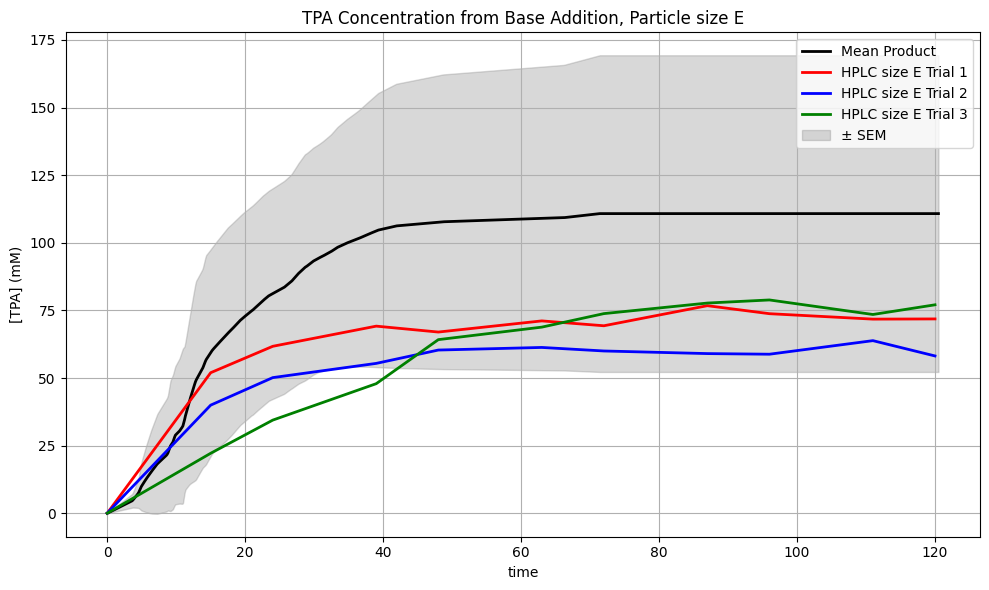

In [277]:
# constants
OH_stock_M = 0.5        # M
V_reactor_mL = 12.0     # mL
stoich_TPA_per_OH = 2.0 # [TPA] = 2 * [OH-]_reactor

for i, col in enumerate(['trial1', 'trial2', 'trial3'], start=1):
    V_base = dfe_smoothed[col].astype(float)
    dfe_smoothed[f'product{i}e'] = stoich_TPA_per_OH * (OH_stock_M * V_base / (V_reactor_mL + V_base)) * 1000

product_cols = [f'product{i}e' for i in range(1, 4)]
dfe_smoothed['product_mean'] = dfe_smoothed[product_cols].mean(axis=1)
dfe_smoothed['product_sem'] = dfe_smoothed[product_cols].std(axis=1, ddof=1) / np.sqrt(len(product_cols))

dfe_smoothed['upper_product'] = dfe_smoothed['product_mean'] + 1.96 * dfe_smoothed['product_sem']
dfe_smoothed['lower_product'] = dfe_smoothed['product_mean'] - 1.96 * dfe_smoothed['product_sem']

# --- Calculate % of HPLC points within confidence interval ---
# First, interpolate the CI bounds to match HPLC time points
lower_interp = np.interp(HPLC['Time'], dfe_smoothed['time'], dfe_smoothed['lower_product'])
upper_interp = np.interp(HPLC['Time'], dfe_smoothed['time'], dfe_smoothed['upper_product'])

# Combine all three HPLC trials into one check
HPLC_trials = ['5e1', '5e2', '5e3']
within_counts = 0
total_counts = 0

for trial in HPLC_trials:
    values = HPLC[trial].values
    within = (values >= lower_interp) & (values <= upper_interp)
    within_counts += np.sum(within)
    total_counts += len(values)

percent_within_CI = (within_counts / total_counts) * 100

print(f"{percent_within_CI:.2f}% of HPLC points lie within the 95% confidence interval.")




plt.figure(figsize=(10,6))
plt.plot(dfe_smoothed['time'], dfe_smoothed['product_mean'], color='black', linewidth=2, label='Mean Product')

plt.plot(HPLC['Time'], HPLC['5e1'], color='red', linewidth=2, label='HPLC size E Trial 1')
plt.plot(HPLC['Time'], HPLC['5e2'], color='blue', linewidth=2, label='HPLC size E Trial 2')
plt.plot(HPLC['Time'], HPLC['5e3'], color='green', linewidth=2, label='HPLC size E Trial 3')

plt.fill_between(dfe_smoothed['time'],
                 dfe_smoothed['lower_product'],
                 dfe_smoothed['upper_product'],
                 color='gray', alpha=0.3, label='± SEM')

plt.xlabel('time')
plt.ylabel('[TPA] (mM)')
plt.title('TPA Concentration from Base Addition, Particle size E')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# pH data and lowess function 
this data will be used as part of the ml model later 

## Particle A 

In [278]:
#creating duplicates for pH data analysis to be used for data checking 
apH1 = pd.DataFrame({'Time': a['Time'], 'pH': a['pH']})
apH2 = pd.DataFrame({'Time': a['Time.1'], 'pH': a['pH.1']})
apH3 = pd.DataFrame({'Time': a['Time.2'], 'pH': a['pH.2']})

bpH1 = pd.DataFrame({'Time': b['Time'], 'pH': b['pH']})
bpH2 = pd.DataFrame({'Time': b['Time.1'], 'pH': b['pH.1']})
bpH3 = pd.DataFrame({'Time': b['Time.2'], 'pH': b['pH.2']})

cpH1 = pd.DataFrame({'Time': c['Time'], 'pH': c['pH']})
cpH2 = pd.DataFrame({'Time': c['Time.1'], 'pH': c['pH.1']})
cpH3 = pd.DataFrame({'Time': c['Time.2'], 'pH': c['pH.2']})

dpH1 = pd.DataFrame({'Time': d['Time'], 'pH': d['pH']})
dpH2 = pd.DataFrame({'Time': d['Time.1'], 'pH': d['pH.1']})
dpH3 = pd.DataFrame({'Time': d['Time.2'], 'pH': d['pH.2']})

epH1 = pd.DataFrame({'Time': e['Time'], 'pH': e['pH']})
epH2 = pd.DataFrame({'Time': e['Time.1'], 'pH': e['pH.1']})
epH3 = pd.DataFrame({'Time': e['Time.2'], 'pH': e['pH.2']})

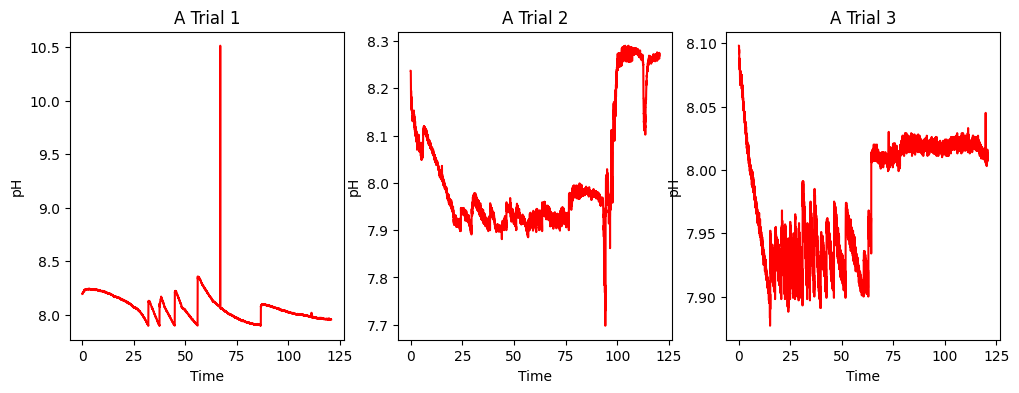

In [279]:
#f,axes = plt.subplots(3,1,figsize = (24,36)) for a larger view of graph
f,axes = plt.subplots(1,3,figsize = (12,4))
sb.lineplot(x=apH1['Time'],y=apH1['pH'],color="red",ax=axes[0])
sb.lineplot(x=apH2['Time'],y=apH2['pH'],color="red", ax=axes[1])
sb.lineplot(x=apH3['Time'],y=apH3['pH'],color="red", ax=axes[2])
axes[0].set_title("A Trial 1")
axes[1].set_title("A Trial 2")
axes[2].set_title("A Trial 3")
plt.show()

Trial 1 (A):  Data is ok to use (99.78% within range)
Trial 2 (A):  Data is ok to use (97.91% within range)
Trial 3 (A):  Data is ok to use (99.09% within range)


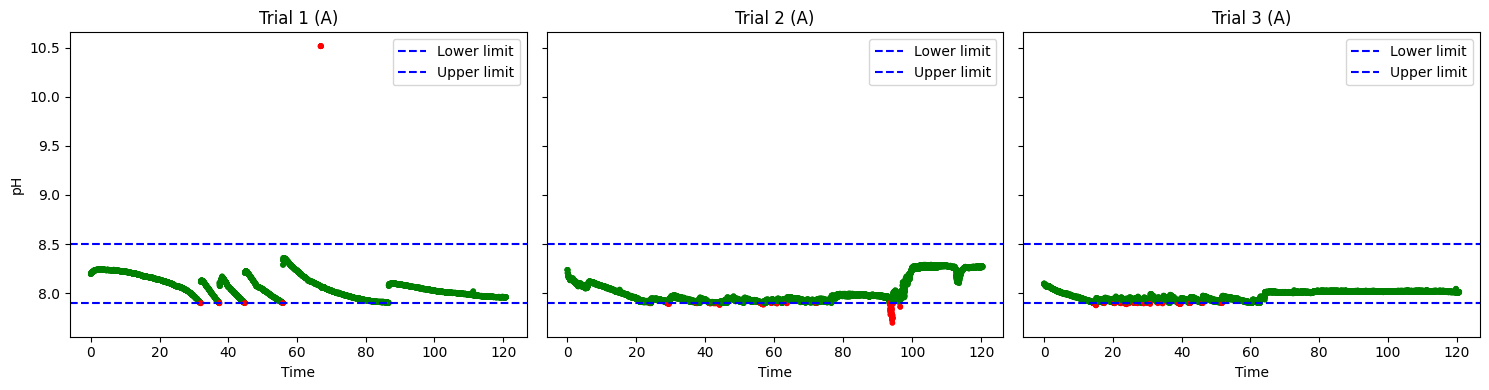

In [280]:
# Example data for 3 trials 
trial_dfs = [apH1,apH2, apH3]  # each should have a 'pH' and 'Time' column
trial_names = ["Trial 1 (A)", "Trial 2 (A)", "Trial 3 (A)"]

# Acceptable pH range
lower, upper = 7.9, 8.5

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for i, (df, name) in enumerate(zip(trial_dfs, trial_names)):
    # Calculate percentage inside range
    inside_mask = (df["pH"] >= lower) & (df["pH"] <= upper)
    percent_inside = inside_mask.mean() * 100  # mean() works since True=1, False=0

    # Print result
    if percent_inside >= 95:
        print(f"{name}:  Data is ok to use ({percent_inside:.2f}% within range)")
    else:
        print(f"{name}: Data is NOT usable ({percent_inside:.2f}% within range)")

    # Plot scatter with color coding
    axes[i].scatter(
        df["Time"], df["pH"],
        c=["green" if ok else "red" for ok in inside_mask],
        s=10
    )
    axes[i].axhline(lower, color="blue", linestyle="--", label="Lower limit")
    axes[i].axhline(upper, color="blue", linestyle="--", label="Upper limit")
    axes[i].set_title(name)
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("pH" if i == 0 else "")
    axes[i].legend()

plt.tight_layout()
plt.show()

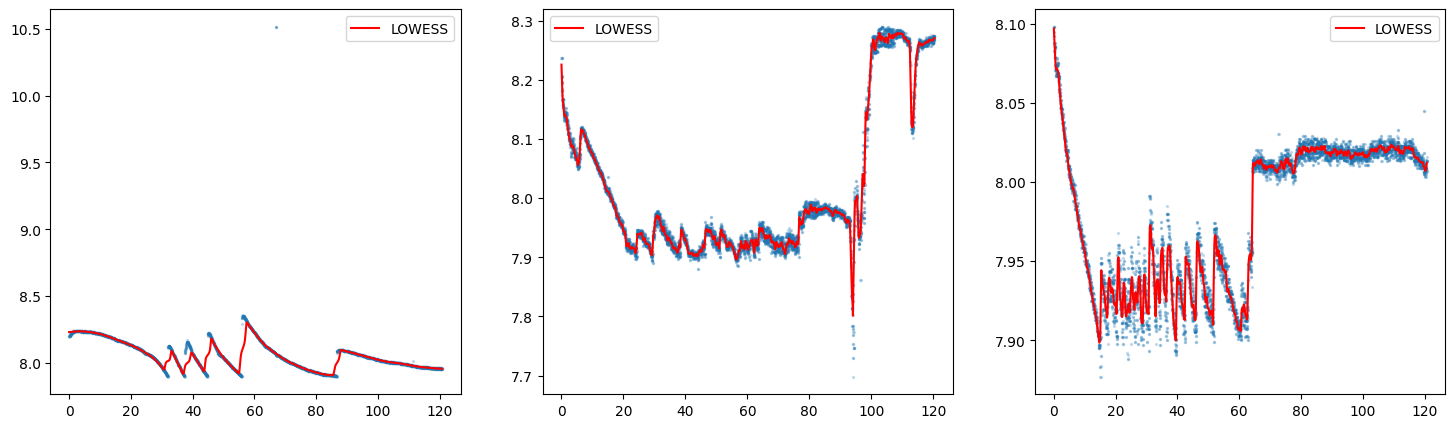

In [281]:
# Particle size A
x1a = a["Time"].values
y1a = a["pH"].values
x2a = a["Time.1"].values
y2a = a["pH.1"].values
x3a = a["Time.2"].values
y3a = a["pH.2"].values

# Fit LOWESS
lowess = sm.nonparametric.lowess
smoothed1a = lowess(y1a, x1a, frac=0.05)
x1a_smooth = smoothed1a[:,0]
y1a_smooth = smoothed1a[:,1]
dy_dx1a = np.gradient(y1a_smooth, x1a_smooth)

smoothed2a = lowess(y2a, x2a, frac=0.005)
x2a_smooth = smoothed2a[:,0]
y2a_smooth = smoothed2a[:,1]

smoothed3a = lowess(y3a, x3a, frac=0.005)
x3a_smooth = smoothed3a[:,0]
y3a_smooth = smoothed3a[:,1]


fig, axes = plt.subplots(1,3, figsize=(18,5))

# to view only the smoothed line, comment out axes[x].plot (x3) lines below 
# same for all the particles below 
axes[0].scatter(x1a, y1a, alpha=0.1,s=2)
axes[0].plot(smoothed1a[:,0], smoothed1a[:,1], 'r-', label="LOWESS")
axes[0].legend()

axes[1].scatter(x2a, y2a, alpha=0.2,s=2)
axes[1].plot(smoothed2a[:,0], smoothed2a[:,1], 'r-', label="LOWESS")
axes[1].legend()

axes[2].scatter(x3a, y3a, alpha=0.2, s=2)
axes[2].plot(smoothed3a[:,0], smoothed3a[:,1], 'r-', label="LOWESS")
axes[2].legend()


plt.show()

## Particle B 

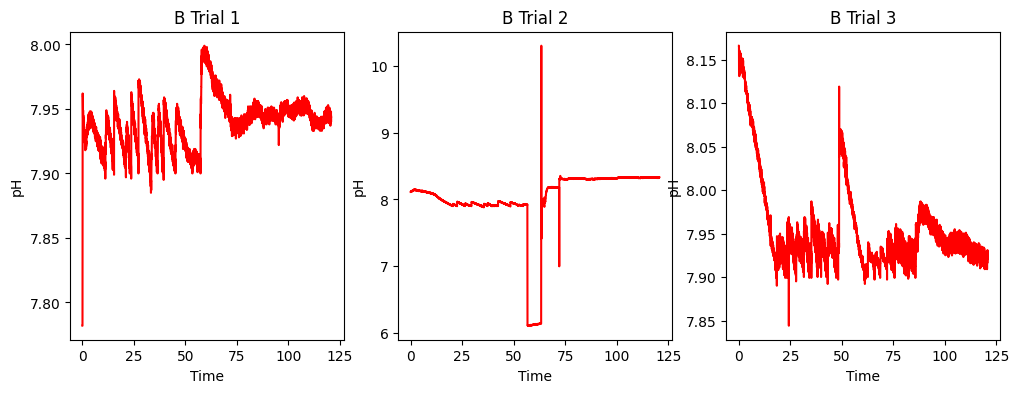

In [282]:
# f,axes = plt.subplots(3,1,figsize = (24,36)) for a larger view of graph
f, axes = plt.subplots(1, 3, figsize=(12,4))

sb.lineplot(x=bpH1['Time'], y=bpH1['pH'], color="red", ax=axes[0])
sb.lineplot(x=bpH2['Time'], y=bpH2['pH'], color="red", ax=axes[1])
sb.lineplot(x=bpH3['Time'], y=bpH3['pH'], color="red", ax=axes[2])

axes[0].set_title("B Trial 1")
axes[1].set_title("B Trial 2")
axes[2].set_title("B Trial 3")

plt.show()

Trial 1:  Data is ok to use (99.34% within range)
Trial 2: Data is NOT usable (92.91% within range)
Trial 3:  Data is ok to use (99.25% within range)


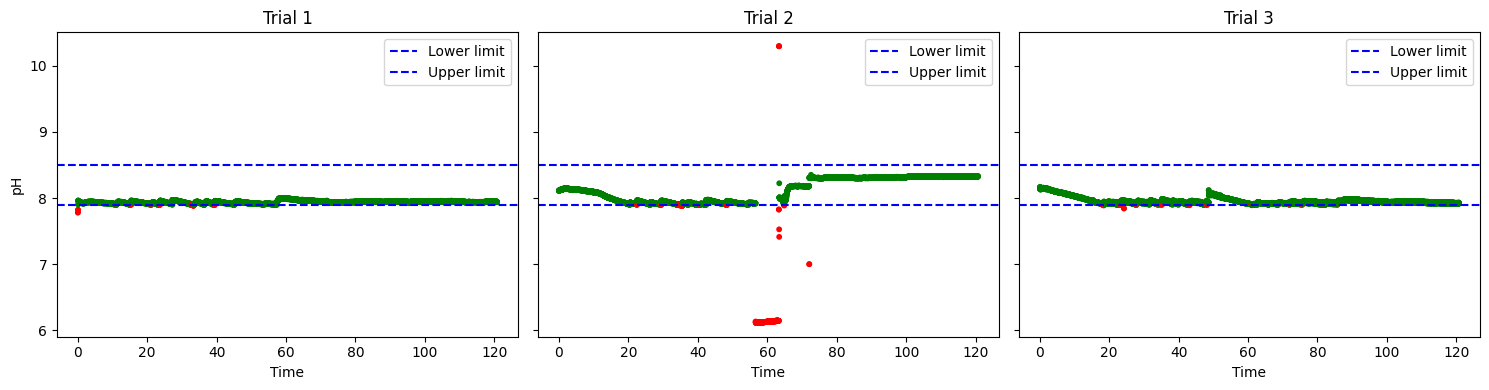

In [283]:
# Example data for 3 trials 
trial_dfs = [bpH1,bpH2, bpH3]  # each should have a 'pH' and 'Time' column
trial_names = ["Trial 1", "Trial 2", "Trial 3"]

# Acceptable pH range
lower, upper = 7.9, 8.5

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for i, (df, name) in enumerate(zip(trial_dfs, trial_names)):
    # Calculate percentage inside range
    inside_mask = (df["pH"] >= lower) & (df["pH"] <= upper)
    percent_inside = inside_mask.mean() * 100  # mean() works since True=1, False=0

    # Print result
    if percent_inside >= 95:
        print(f"{name}:  Data is ok to use ({percent_inside:.2f}% within range)")
    else:
        print(f"{name}: Data is NOT usable ({percent_inside:.2f}% within range)")

    # Plot scatter with color coding
    axes[i].scatter(
        df["Time"], df["pH"],
        c=["green" if ok else "red" for ok in inside_mask],
        s=10
    )
    axes[i].axhline(lower, color="blue", linestyle="--", label="Lower limit")
    axes[i].axhline(upper, color="blue", linestyle="--", label="Upper limit")
    axes[i].set_title(name)
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("pH" if i == 0 else "")
    axes[i].legend()

plt.tight_layout()
plt.show()

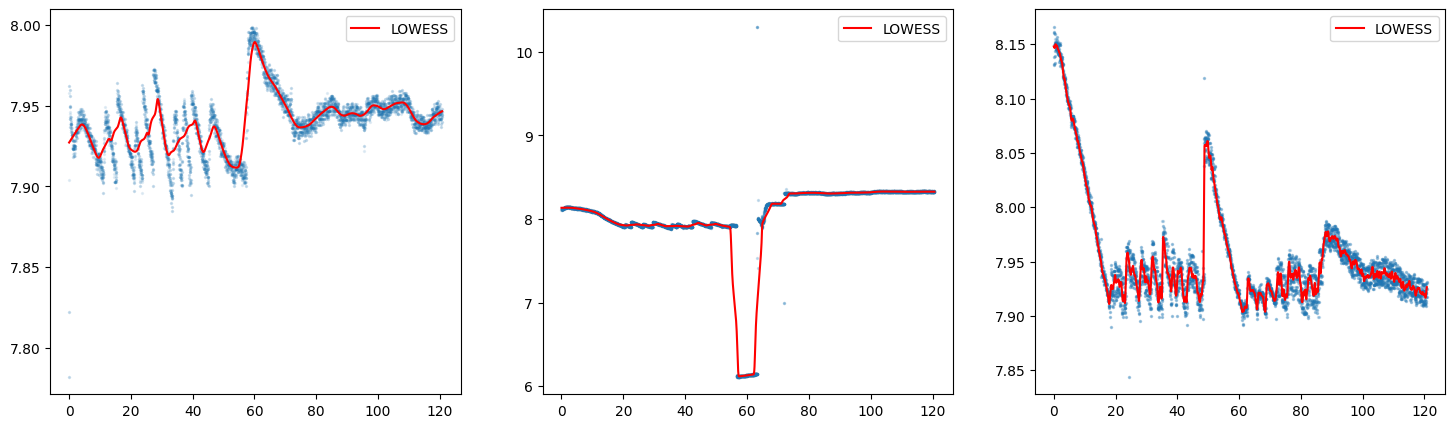

In [284]:
# Particle size B 
x1b = b["Time"].values
y1b = b["pH"].values
x2b = b["Time.1"].values
y2b = b["pH.1"].values
x3b = b["Time.2"].values
y3b = b["pH.2"].values

# Fit LOWESS
lowess = sm.nonparametric.lowess
smoothed1b = lowess(y1b, x1b, frac=0.05)
x1b_smooth = smoothed1b[:,0]
y1b_smooth = smoothed1b[:,1]

smoothed2b = lowess(y2b, x2b, frac=0.05)
x2b_smooth = smoothed2b[:,0]
y2b_smooth = smoothed2b[:,1]

smoothed3b = lowess(y3b, x3b, frac=0.005)
x3b_smooth = smoothed3b[:,0]
y3b_smooth = smoothed3b[:,1]


fig, axes = plt.subplots(1,3, figsize=(18,5))

axes[0].scatter(x1b, y1b, alpha=0.1,s=2)
axes[0].plot(smoothed1b[:,0], smoothed1b[:,1], 'r-', label="LOWESS")
axes[0].legend()

axes[1].scatter(x2b, y2b, alpha=0.2,s=2)
axes[1].plot(smoothed2b[:,0], smoothed2b[:,1], 'r-', label="LOWESS")
axes[1].legend()

axes[2].scatter(x3b, y3b, alpha=0.2, s=2)
axes[2].plot(smoothed3b[:,0], smoothed3b[:,1], 'r-', label="LOWESS")
axes[2].legend()


plt.show()

## Particle C 

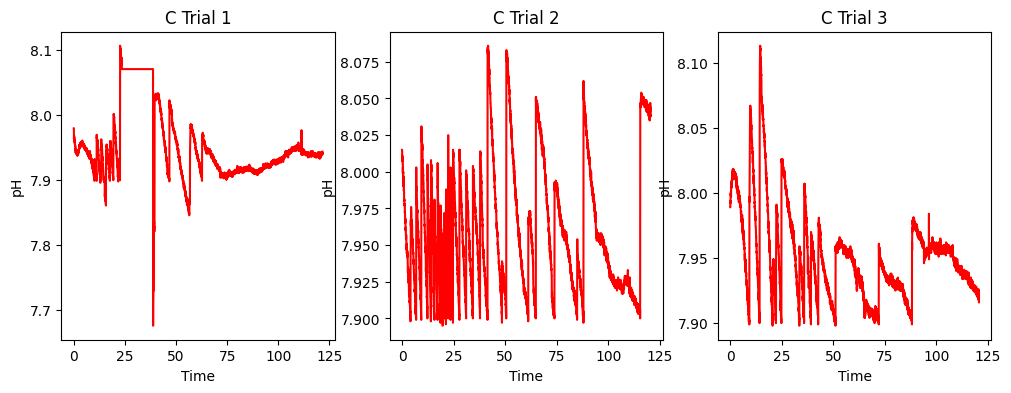

In [285]:
# f,axes = plt.subplots(3,1,figsize = (24,36)) for a larger view of graph
f, axes = plt.subplots(1, 3, figsize=(12,4))

sb.lineplot(x=cpH1['Time'], y=cpH1['pH'], color="red", ax=axes[0])
sb.lineplot(x=cpH2['Time'], y=cpH2['pH'], color="red", ax=axes[1])
sb.lineplot(x=cpH3['Time'], y=cpH3['pH'], color="red", ax=axes[2])

axes[0].set_title("C Trial 1")
axes[1].set_title("C Trial 2")
axes[2].set_title("C Trial 3")

plt.show()

Trial 1:  Data is ok to use (95.73% within range)
Trial 2:  Data is ok to use (98.60% within range)
Trial 3:  Data is ok to use (98.82% within range)


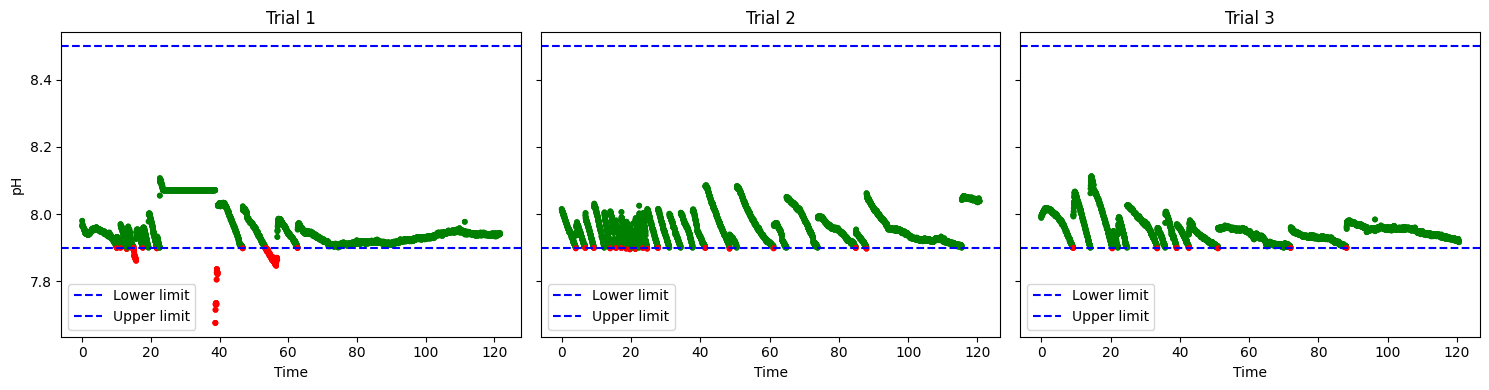

In [286]:
# Example data for 3 trials 
trial_dfs = [cpH1,cpH2, cpH3]  # each should have a 'pH' and 'Time' column
trial_names = ["Trial 1", "Trial 2", "Trial 3"]

# Acceptable pH range
lower, upper = 7.9, 8.5

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for i, (df, name) in enumerate(zip(trial_dfs, trial_names)):
    # Calculate percentage inside range
    inside_mask = (df["pH"] >= lower) & (df["pH"] <= upper)
    percent_inside = inside_mask.mean() * 100  # mean() works since True=1, False=0

    # Print result
    if percent_inside >= 95:
        print(f"{name}:  Data is ok to use ({percent_inside:.2f}% within range)")
    else:
        print(f"{name}: Data is NOT usable ({percent_inside:.2f}% within range)")

    # Plot scatter with color coding
    axes[i].scatter(
        df["Time"], df["pH"],
        c=["green" if ok else "red" for ok in inside_mask],
        s=10
    )
    axes[i].axhline(lower, color="blue", linestyle="--", label="Lower limit")
    axes[i].axhline(upper, color="blue", linestyle="--", label="Upper limit")
    axes[i].set_title(name)
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("pH" if i == 0 else "")
    axes[i].legend()

plt.tight_layout()
plt.show()

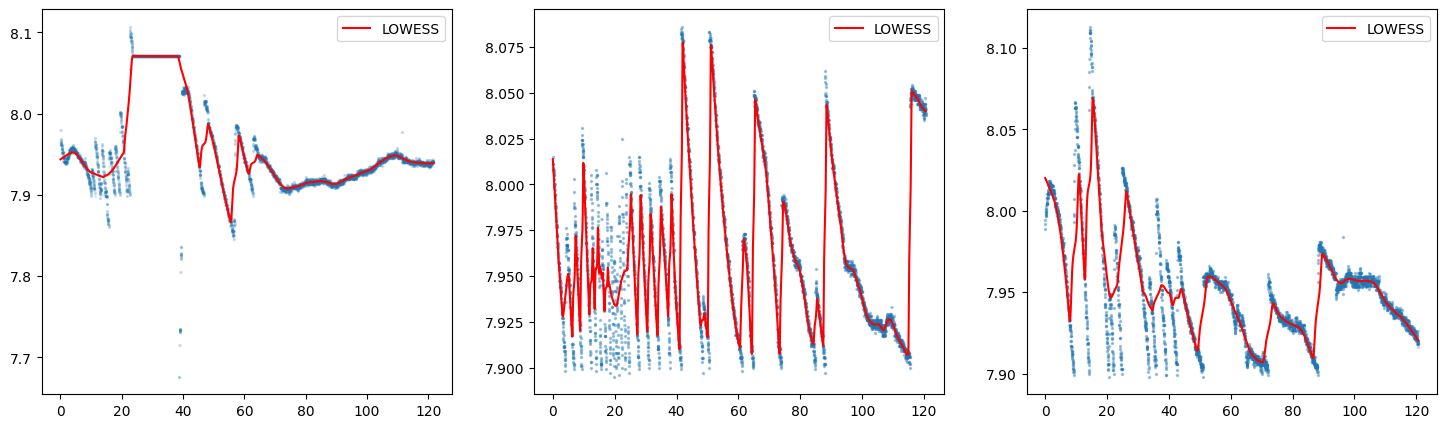

In [287]:
# Partcile size C
x1c = c["Time"].values
y1c = c["pH"].values
x2c = c["Time.1"].values
y2c = c["pH.1"].values
x3c = c["Time.2"].values
y3c = c["pH.2"].values

# Fit LOWESS
lowess = sm.nonparametric.lowess
smoothed1c = lowess(y1c, x1c, frac=0.05)
x1c_smooth = smoothed1c[:,0]
y1c_smooth = smoothed1c[:,1]

smoothed2c = lowess(y2c, x2c, frac=0.02)
x2c_smooth = smoothed2c[:,0]
y2c_smooth = smoothed2c[:,1]

smoothed3c = lowess(y3c, x3c, frac=0.05)
x3c_smooth = smoothed3c[:,0]
y3c_smooth = smoothed3c[:,1]


fig, axes = plt.subplots(1,3, figsize=(18,5))

axes[0].scatter(x1c, y1c, alpha=0.1,s=2)
axes[0].plot(smoothed1c[:,0], smoothed1c[:,1], 'r-', label="LOWESS")
axes[0].legend()

axes[1].scatter(x2c, y2c, alpha=0.2,s=2)
axes[1].plot(smoothed2c[:,0], smoothed2c[:,1], 'r-', label="LOWESS")
axes[1].legend()

axes[2].scatter(x3c, y3c, alpha=0.2, s=2)
axes[2].plot(smoothed3c[:,0], smoothed3c[:,1], 'r-', label="LOWESS")
axes[2].legend()


plt.show()

## Particle size D 

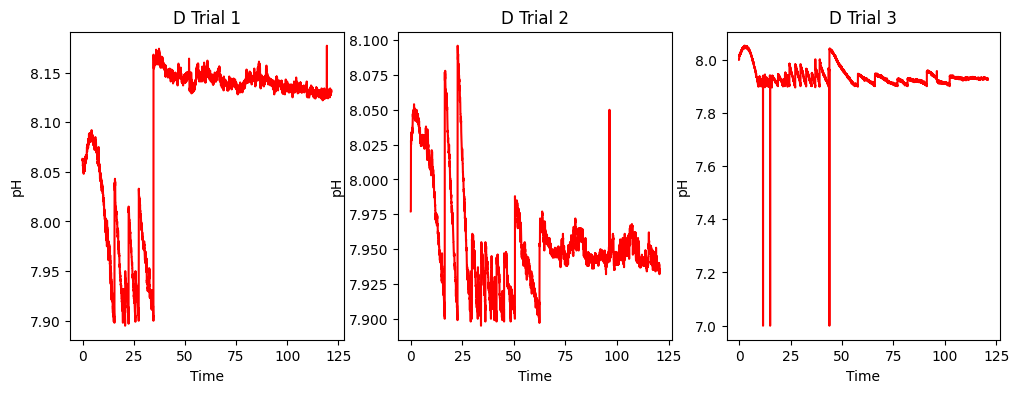

In [288]:
# f,axes = plt.subplots(3,1,figsize = (24,36)) for a larger view of graph
f, axes = plt.subplots(1, 3, figsize=(12,4))

sb.lineplot(x=dpH1['Time'], y=dpH1['pH'], color="red", ax=axes[0])
sb.lineplot(x=dpH2['Time'], y=dpH2['pH'], color="red", ax=axes[1])
sb.lineplot(x=dpH3['Time'], y=dpH3['pH'], color="red", ax=axes[2])

axes[0].set_title("D Trial 1")
axes[1].set_title("D Trial 2")
axes[2].set_title("D Trial 3")

plt.show()

Trial 1:  Data is ok to use (99.83% within range)
Trial 2:  Data is ok to use (98.90% within range)
Trial 3:  Data is ok to use (98.84% within range)


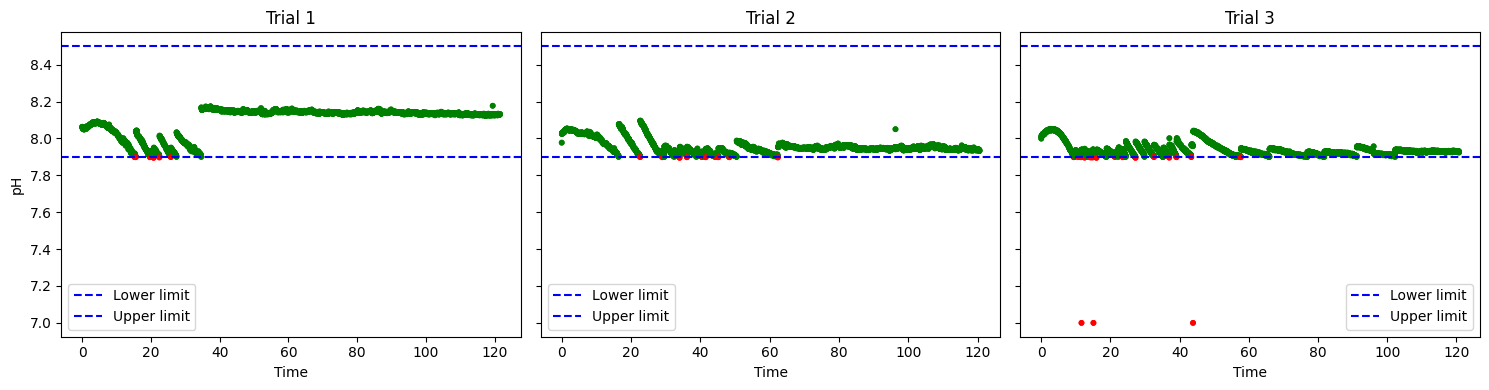

In [289]:
# Example data for 3 trials 
trial_dfs = [dpH1,dpH2, dpH3]  # each should have a 'pH' and 'Time' column
trial_names = ["Trial 1", "Trial 2", "Trial 3"]

# Acceptable pH range
lower, upper = 7.9, 8.5

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for i, (df, name) in enumerate(zip(trial_dfs, trial_names)):
    # Calculate percentage inside range
    inside_mask = (df["pH"] >= lower) & (df["pH"] <= upper)
    percent_inside = inside_mask.mean() * 100  # mean() works since True=1, False=0

    # Print result
    if percent_inside >= 95:
        print(f"{name}:  Data is ok to use ({percent_inside:.2f}% within range)")
    else:
        print(f"{name}: Data is NOT usable ({percent_inside:.2f}% within range)")

    # Plot scatter with color coding
    axes[i].scatter(
        df["Time"], df["pH"],
        c=["green" if ok else "red" for ok in inside_mask],
        s=10
    )
    axes[i].axhline(lower, color="blue", linestyle="--", label="Lower limit")
    axes[i].axhline(upper, color="blue", linestyle="--", label="Upper limit")
    axes[i].set_title(name)
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("pH" if i == 0 else "")
    axes[i].legend()

plt.tight_layout()
plt.show()

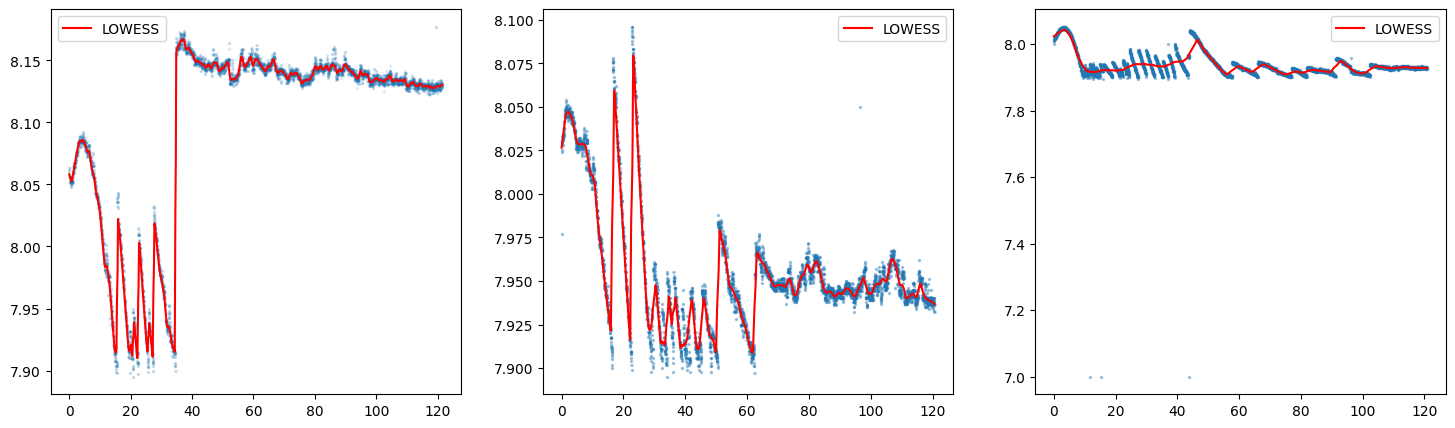

In [290]:
# Particle size D
x1d = d["Time"].values
y1d = d["pH"].values
x2d = d["Time.1"].values
y2d = d["pH.1"].values
x3d = d["Time.2"].values
y3d = d["pH.2"].values

# Fit LOWESS
lowess = sm.nonparametric.lowess
smoothed1d = lowess(y1d, x1d, frac=0.01)
x1d_smooth = smoothed1d[:,0]
y1d_smooth = smoothed1d[:,1]

smoothed2d = lowess(y2d, x2d, frac=0.02)
x2d_smooth = smoothed2d[:,0]
y2d_smooth = smoothed2d[:,1]

smoothed3d = lowess(y3d, x3d, frac=0.05)
x3d_smooth = smoothed3d[:,0]
y3d_smooth = smoothed3d[:,1]


fig, axes = plt.subplots(1,3, figsize=(18,5))

axes[0].scatter(x1d, y1d, alpha=0.1,s=2)
axes[0].plot(smoothed1d[:,0], smoothed1d[:,1], 'r-', label="LOWESS")
axes[0].legend()

axes[1].scatter(x2d, y2d, alpha=0.2,s=2)
axes[1].plot(smoothed2d[:,0], smoothed2d[:,1], 'r-', label="LOWESS")
axes[1].legend()

axes[2].scatter(x3d, y3d, alpha=0.2, s=2)
axes[2].plot(smoothed3d[:,0], smoothed3d[:,1], 'r-', label="LOWESS")
axes[2].legend()


plt.show()

## Particle E 


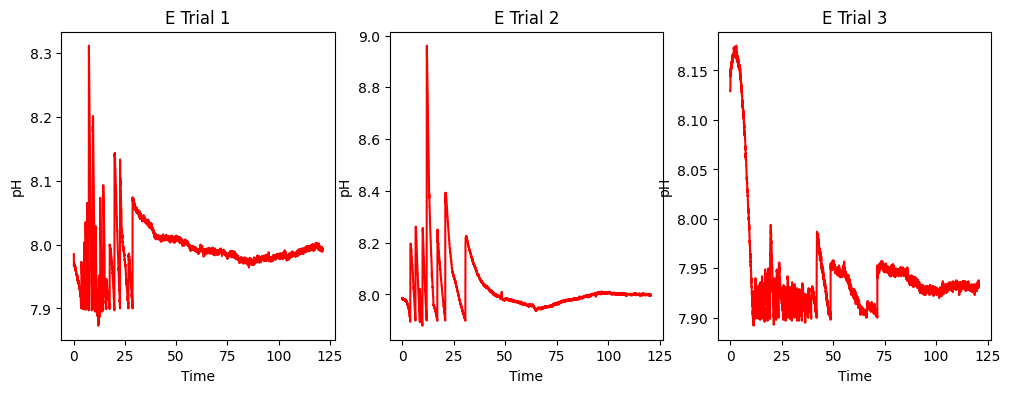

In [291]:
# f,axes = plt.subplots(3,1,figsize = (24,36)) for a larger view of graph
f, axes = plt.subplots(1, 3, figsize=(12,4))

sb.lineplot(x=epH1['Time'], y=epH1['pH'], color="red", ax=axes[0])
sb.lineplot(x=epH2['Time'], y=epH2['pH'], color="red", ax=axes[1])
sb.lineplot(x=epH3['Time'], y=epH3['pH'], color="red", ax=axes[2])

axes[0].set_title("E Trial 1")
axes[1].set_title("E Trial 2")
axes[2].set_title("E Trial 3")

plt.show()

Trial 1:  Data is ok to use (99.19% within range)
Trial 2:  Data is ok to use (97.95% within range)
Trial 3:  Data is ok to use (98.65% within range)


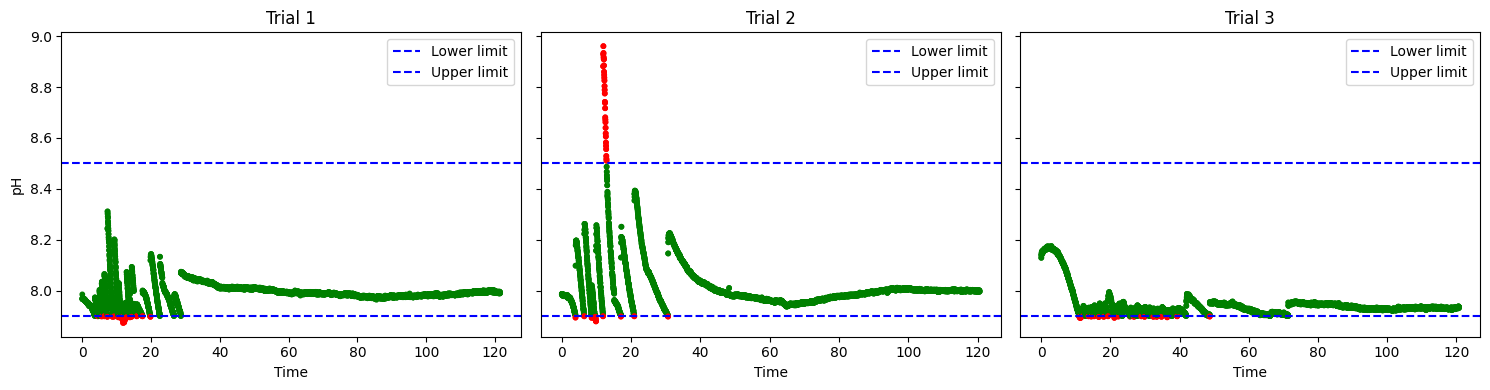

In [292]:
# Example data for 3 trials (replace with your real DataFrames)
trial_dfs = [epH1,epH2, epH3]  # each should have a 'pH' and 'Time' column
trial_names = ["Trial 1", "Trial 2", "Trial 3"]

# Acceptable pH range
lower, upper = 7.9, 8.5

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for i, (df, name) in enumerate(zip(trial_dfs, trial_names)):
    # Calculate percentage inside range
    inside_mask = (df["pH"] >= lower) & (df["pH"] <= upper)
    percent_inside = inside_mask.mean() * 100  # mean() works since True=1, False=0

    # Print result
    if percent_inside >= 95:
        print(f"{name}:  Data is ok to use ({percent_inside:.2f}% within range)")
    else:
        print(f"{name}: Data is NOT usable ({percent_inside:.2f}% within range)")

    # Plot scatter with color coding
    axes[i].scatter(
        df["Time"], df["pH"],
        c=["green" if ok else "red" for ok in inside_mask],
        s=10
    )
    axes[i].axhline(lower, color="blue", linestyle="--", label="Lower limit")
    axes[i].axhline(upper, color="blue", linestyle="--", label="Upper limit")
    axes[i].set_title(name)
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("pH" if i == 0 else "")
    axes[i].legend()

plt.tight_layout()
plt.show()

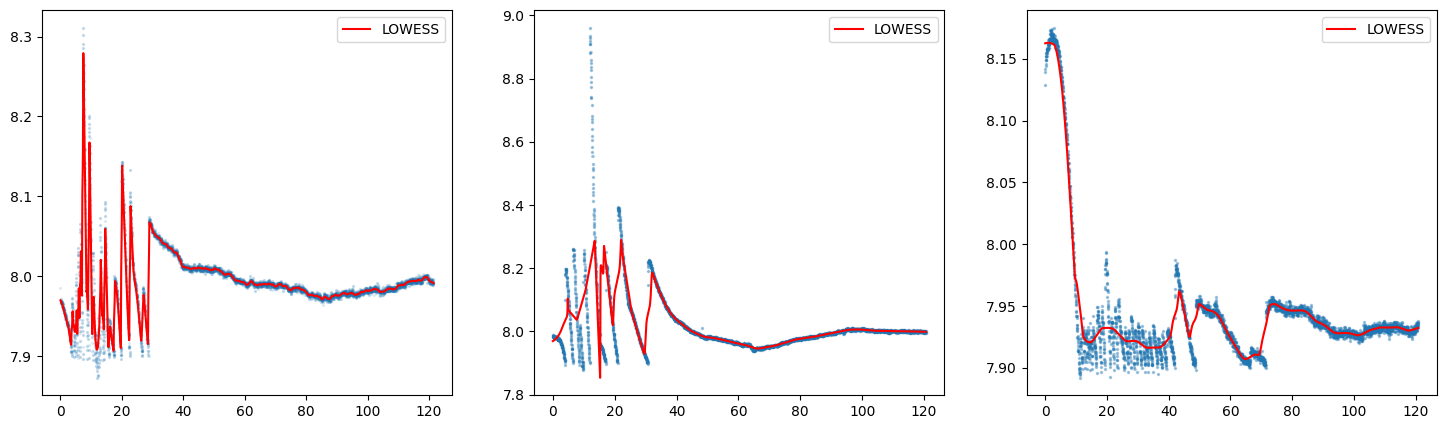

In [293]:
#Particle size E
x1e = e["Time"].values
y1e = e["pH"].values
x2e = e["Time.1"].values
y2e = e["pH.1"].values
x3e = e["Time.2"].values
y3e = e["pH.2"].values

# Fit LOWESS
lowess = sm.nonparametric.lowess
smoothed1e = lowess(y1e, x1e, frac=0.009)
x1e_smooth = smoothed1e[:,0]
y1e_smooth = smoothed1e[:,1]

smoothed2e = lowess(y2e, x2e, frac=0.05)
x2e_smooth = smoothed2e[:,0]
y2e_smooth = smoothed2e[:,1]

smoothed3e = lowess(y3e, x3e, frac=0.05)
x3e_smooth = smoothed3e[:,0]
y3e_smooth = smoothed3e[:,1]


fig, axes = plt.subplots(1,3, figsize=(18,5))

axes[0].scatter(x1e, y1e, alpha=0.1,s=2)
axes[0].plot(smoothed1e[:,0], smoothed1e[:,1], 'r-', label="LOWESS")
axes[0].legend()

axes[1].scatter(x2e, y2e, alpha=0.2,s=2)
axes[1].plot(smoothed2e[:,0], smoothed2e[:,1], 'r-', label="LOWESS")
axes[1].legend()

axes[2].scatter(x3e, y3e, alpha=0.2, s=2)
axes[2].plot(smoothed3e[:,0], smoothed3e[:,1], 'r-', label="LOWESS")
axes[2].legend()


plt.show()

# XGBoost Model 

In [294]:
#all smoothed values for different particle sizes are in numpy arrays 
#convert to data frame 
column_headers = ['Time','pH_smooth']
a1 = pd.DataFrame(data=smoothed1a, columns=column_headers)
a2 = pd.DataFrame(data=smoothed2a, columns=column_headers)
a3 = pd.DataFrame(data=smoothed3a, columns=column_headers)

b1 = pd.DataFrame(data=smoothed1b, columns=column_headers)
b2 = pd.DataFrame(data=smoothed2b, columns=column_headers)
b3 = pd.DataFrame(data=smoothed3b, columns=column_headers)

c1 = pd.DataFrame(data=smoothed1c, columns=column_headers)
c2 = pd.DataFrame(data=smoothed2c, columns=column_headers)
c3 = pd.DataFrame(data=smoothed3c, columns=column_headers)

d1 = pd.DataFrame(data=smoothed1d, columns=column_headers)
d2 = pd.DataFrame(data=smoothed2d, columns=column_headers)
d3 = pd.DataFrame(data=smoothed3d, columns=column_headers)

e1 = pd.DataFrame(data=smoothed1e, columns=column_headers)
e2 = pd.DataFrame(data=smoothed2e, columns=column_headers)
e3 = pd.DataFrame(data=smoothed3e, columns=column_headers)

In [295]:
datasets = ['a', 'b', 'c', 'd', 'e']

for prefix in datasets:
    for i in range(1, 4):
        df = globals()[f"{prefix}{i}"]
        base_array = globals()[f"{prefix}{i}_smoothed_interp"] 
        globals()[f"{prefix}{i}_new"] = pd.DataFrame({
            'Time': common_time,
            'pH_interp': np.interp(common_time, df['Time'], df['pH_smooth']),
            'Base_interp': base_array
        })

In [296]:
a1_new.head()

,Time,pH_interp,Base_interp
0,0.000000,8.232031,0.000000
1,0.120621,8.232358,0.000283
2,0.241241,8.232678,0.000566
3,0.361862,8.232992,0.000849
4,0.482482,8.233299,0.001132


In [297]:
# Put all 15 trials into a dictionary with _new appended to variable names
datasets = {
    'a1_new': a1_new, 'a2_new': a2_new, 'a3_new': a3_new,
    'b1_new': b1_new, 'b2_new': b2_new, 'b3_new': b3_new,
    'c1_new': c1_new, 'c2_new': c2_new, 'c3_new': c3_new,
    'd1_new': d1_new, 'd2_new': d2_new, 'd3_new': d3_new,
    'e1_new': e1_new, 'e2_new': e2_new, 'e3_new': e3_new
}


In [298]:
# Loop through each dataset
for name, df in datasets.items():
    
    # Add a trial name column for easier splitting later 
    df['Trial'] = name
    
    # Ensure sorted by Time
    df = df.sort_values(by='Time').reset_index(drop=True)

    # 1st derivative of pH
    df['dpH_dt'] = np.gradient(df['pH_interp'], df['Time'])
    
    # 2nd derivative of pH
    df['d2pH_dt2'] = np.gradient(df['dpH_dt'], df['Time'])
    
    # Rolling average of pH
    df['pH_av'] = df['pH_interp'].rolling(window=100,center=True, min_periods=1).mean()
    
    # 1st derivative of pH 
    df['dpH_dt_av'] = np.gradient(df['pH_av'], df['Time'])
    
    # Drop rows where all values are NaN
    df.dropna(how='all', inplace=True)

    # Update dataset back to dictionary
    datasets[name] = df

In [299]:
 # Optionally unpack if you want individual variables again
a1_new, a2_new, a3_new = datasets['a1_new'], datasets['a2_new'], datasets['a3_new']
b1_new, b2_new, b3_new = datasets['b1_new'], datasets['b2_new'], datasets['b3_new']
c1_new, c2_new, c3_new = datasets['c1_new'], datasets['c2_new'], datasets['c3_new']
d1_new, d2_new, d3_new = datasets['d1_new'], datasets['d2_new'], datasets['d3_new']
e1_new, e2_new, e3_new = datasets['e1_new'], datasets['e2_new'], datasets['e3_new']


In [300]:
a1_new.head()

,Time,pH_interp,Base_interp,Trial,dpH_dt,d2pH_dt2,pH_av,dpH_dt_av
0,0.000000,8.232031,0.000000,a1_new,0.002709,-0.000207,8.236045,-0.000327
1,0.120621,8.232358,0.000283,a1_new,0.002684,-0.000320,8.236006,-0.000344
2,0.241241,8.232678,0.000566,a1_new,0.002632,-0.000452,8.235962,-0.000377
3,0.361862,8.232992,0.000849,a1_new,0.002575,-0.000486,8.235915,-0.000411
4,0.482482,8.233299,0.001132,a1_new,0.002514,-0.000518,8.235863,-0.000444


In [301]:
manual_triggers = {
    "a1_new": 53.15315,
    "a2_new": 53.15315,
    "a3_new": 53.15315,
    "b1_new": 53.15315,
    "b2_new": 53.15315,
    "b3_new": 53.15315,
    "c1_new": 53.003,
    "c2_new": 53.003,
    "c3_new": 53.003,
    "d1_new": 43.5435,
    "d2_new": 43.5435,
    "d3_new": 43.5435,
    "e1_new": 30.7807,
    "e2_new": 30.7807,
    "e3_new": 30.7807,
}

time_window = 5  #hrs before and after the trigger

for name, df in datasets.items():
    df['pump_signal'] = 0
    trigger_time = manual_triggers.get(name, None)
    
    if trigger_time is not None:
        # Find all indices where Time is within ±x hours of trigger
        mask = (df['Time'] >= trigger_time - time_window) & (df['Time'] <= trigger_time + time_window)
        df.loc[mask, 'pump_signal'] = 1

In [302]:
 # Optionally unpack to get individual variables again
a1_new, a2_new, a3_new = datasets['a1_new'], datasets['a2_new'], datasets['a3_new']
b1_new, b2_new, b3_new = datasets['b1_new'], datasets['b2_new'], datasets['b3_new']
c1_new, c2_new, c3_new = datasets['c1_new'], datasets['c2_new'], datasets['c3_new']
d1_new, d2_new, d3_new = datasets['d1_new'], datasets['d2_new'], datasets['d3_new']
e1_new, e2_new, e3_new = datasets['e1_new'], datasets['e2_new'], datasets['e3_new']

In [303]:

for name, df in datasets.items():
    trigger_rows = df[df["pump_signal"] == 1]
    print(f"\n=== {name} ===")
    if not trigger_rows.empty:
        print(trigger_rows)
    else:
        print("No pump signal detected.")


=== a1_new ===
          Time  pH_interp  Base_interp   Trial    dpH_dt  d2pH_dt2     pH_av  \
400  48.248248   8.097945     0.248241  a1_new -0.033488  0.001252  8.037690   
401  48.368869   8.093914     0.249056  a1_new -0.033352  0.000946  8.037169   
402  48.489489   8.089899     0.249872  a1_new -0.033260  0.000452  8.036666   
403  48.610110   8.085891     0.250687  a1_new -0.033243 -0.000296  8.036179   
404  48.730731   8.081879     0.251502  a1_new -0.033331 -0.001294  8.035711   
..         ...        ...          ...     ...       ...       ...       ...   
478  57.656657   8.302261     0.304275  a1_new -0.016255 -0.293471  8.119880   
479  57.777277   8.298711     0.304569  a1_new -0.031148 -0.068291  8.121188   
480  57.897898   8.294747     0.304864  a1_new -0.032730 -0.005391  8.122500   
481  58.018519   8.290815     0.305158  a1_new -0.032448  0.002280  8.123816   
482  58.139139   8.286919     0.305452  a1_new -0.032180  0.001996  8.125137   

     dpH_dt_av  pump_si

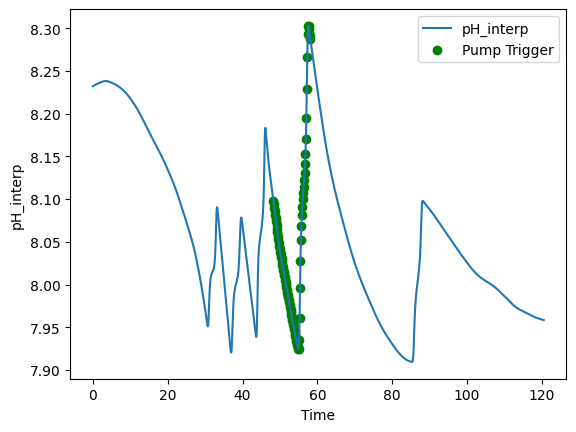

In [304]:
plt.plot(a1_new['Time'], a1_new['pH_interp'], label='pH_interp')
#plt.plot(a1_new['Time'], a1_new['pH_rolling_avg'], label='Rolling Avg', linestyle='--')
plt.scatter(a1_new.loc[a1_new['pump_signal']==1, 'Time'],
            a1_new.loc[a1_new['pump_signal']==1, 'pH_interp'],
            color='green', label='Pump Trigger')
plt.legend()
plt.xlabel('Time')
plt.ylabel('pH_interp')
plt.show()


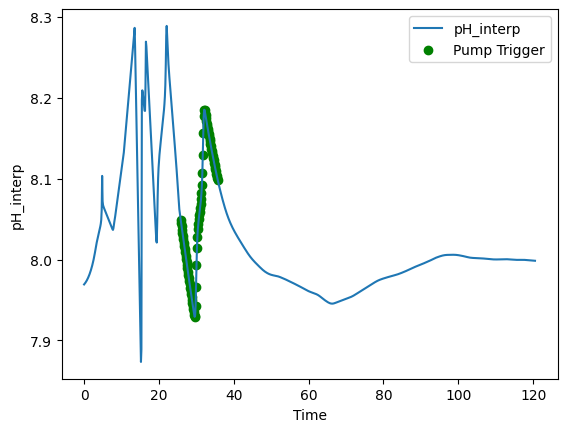

In [305]:
plt.plot(e2_new['Time'], e2_new['pH_interp'], label='pH_interp')
#plt.plot(a1_new['Time'], a1_new['pH_rolling_avg'], label='Rolling Avg', linestyle='--')
plt.scatter(e2_new.loc[e2_new['pump_signal']==1, 'Time'],
            e2_new.loc[e2_new['pump_signal']==1, 'pH_interp'],
            color='green', label='Pump Trigger')
plt.legend()
plt.xlabel('Time')
plt.ylabel('pH_interp')
plt.show()

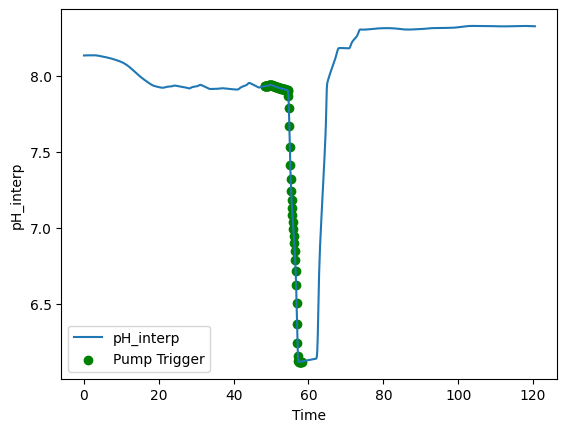

In [306]:
plt.plot(b2_new['Time'], b2_new['pH_interp'], label='pH_interp')
#plt.plot(a1_new['Time'], a1_new['pH_rolling_avg'], label='Rolling Avg', linestyle='--')
plt.scatter(b2_new.loc[b2_new['pump_signal']==1, 'Time'],
            b2_new.loc[b2_new['pump_signal']==1, 'pH_interp'],
            color='green', label='Pump Trigger')
plt.legend()
plt.xlabel('Time')
plt.ylabel('pH_interp')
plt.show()

In [307]:
# Combine training trials using the _new DataFrames
train_dfs = [a3_new, b1_new, b3_new,b2_new, c2_new, c3_new, d1_new,d3_new, e1_new, e3_new,a1_new,c1_new, d2_new]
train_df = pd.concat(train_dfs, ignore_index=True)

# Combine test trials using the _new DataFrames
# Chose e2_new as a good trial and b2_new as a bad trial 
test_dfs = [a2_new, e2_new]
test_df = pd.concat(test_dfs, ignore_index=True)


In [308]:
# Features and Target seperation 
X_train = train_df.drop(columns=['pump_signal','Trial'])
y_train = train_df['pump_signal']

X_test = test_df.drop(columns=['pump_signal','Trial'])
y_test = test_df['pump_signal']


In [309]:
# Compute scale_pos_weight = (#negative / #positive)
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale_pos_weight = neg / pos
print(f"scale_pos_weight = {scale_pos_weight:.2f}")


scale_pos_weight = 11.05


In [310]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight
    
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [311]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.896

Confusion Matrix:
 [[1709  125]
 [  83   83]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1834
           1       0.40      0.50      0.44       166

    accuracy                           0.90      2000
   macro avg       0.68      0.72      0.69      2000
weighted avg       0.91      0.90      0.90      2000



In [312]:
#Adding predicted y values back to test df
test_df['y_pred'] = y_pred

--- Trial: a2_new ---
          Time  pH_interp  y_pred
347  41.855355   7.906850       1
354  42.699700   7.903901       1
355  42.820320   7.904724       1
356  42.940941   7.904194       1
357  43.061562   7.902981       1
..         ...        ...     ...
479  57.777277   7.920617       1
480  57.897898   7.926850       1
481  58.018519   7.927365       1
482  58.139139   7.924163       1
483  58.259760   7.919859       1

[122 rows x 3 columns]


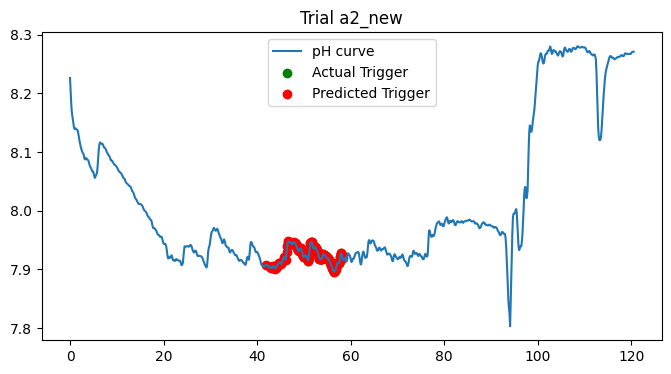

--- Trial: e2_new ---
           Time  pH_interp  y_pred
1398  48.007007   7.986196       1
1399  48.127628   7.985758       1
1400  48.248248   7.985339       1
1401  48.368869   7.984937       1
1402  48.489489   7.984553       1
...         ...        ...     ...
1479  57.777277   7.966332       1
1480  57.897898   7.966045       1
1481  58.018519   7.965759       1
1482  58.139139   7.965472       1
1483  58.259760   7.965184       1

[86 rows x 3 columns]


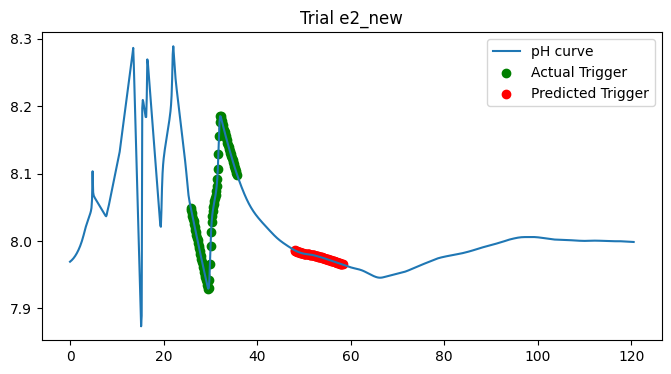

In [313]:
for trial_name, group in test_df.groupby('Trial'):
    print(f"--- Trial: {trial_name} ---")
    print(group[group['y_pred'] == 1][['Time', 'pH_interp', 'y_pred']])  # pump trigger points

    # Example plot
    plt.figure(figsize=(8,4))
    plt.plot(group['Time'], group['pH_interp'], label='pH curve')
    plt.scatter(group.loc[group['pump_signal'] == 1, 'Time'],
                group.loc[group['pump_signal'] == 1, 'pH_interp'],
                color='green', label='Actual Trigger')
    plt.scatter(group.loc[group['y_pred'] == 1, 'Time'],
                group.loc[group['y_pred'] == 1, 'pH_interp'],
                color='red', label='Predicted Trigger')
    plt.title(f"Trial {trial_name}")
    plt.legend()
    plt.show()

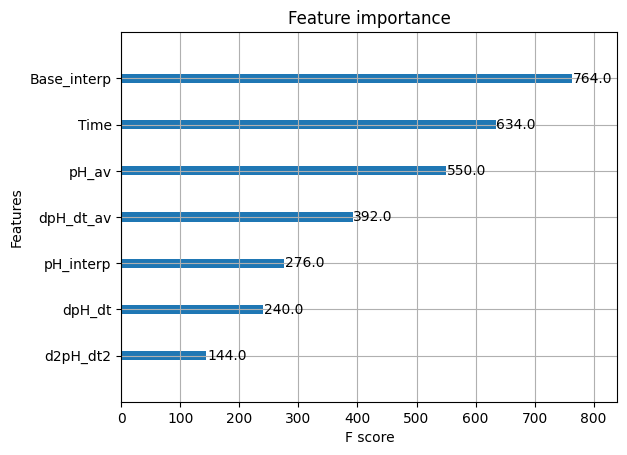

In [314]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model)
plt.show()